# **Merancang dan Menguji IIR Bandpass Filter: Butterworth Filter**

1. Install and Import Required Libraries

In [1]:
!pip install scipy librosa matplotlib numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from google.colab import drive
import os

2. Mount Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


### **BEARING**

3. Load WAV File from Google Drive

Audio loaded successfully!
Sample rate: 16000 Hz
Duration: 10.32 seconds
Data shape: (165200, 2)
Stereo audio detected, using first channel


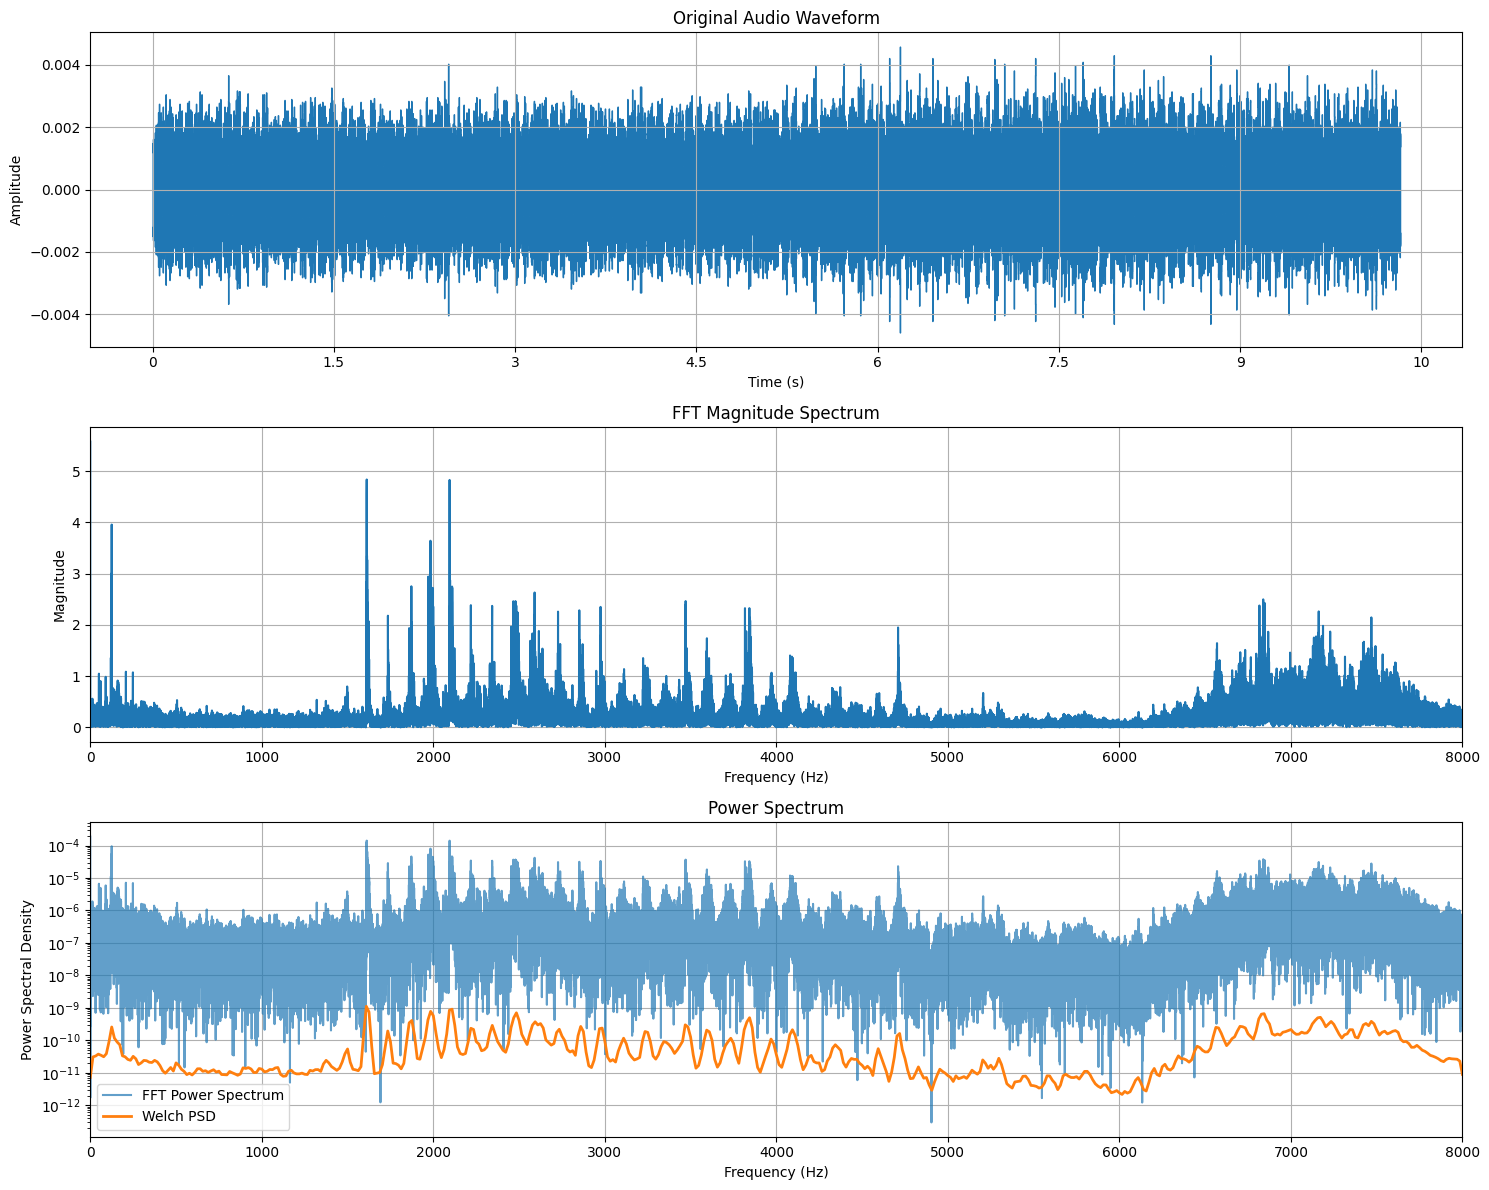


Frequency Analysis Results:
Frequency resolution: 0.10 Hz
Nyquist frequency: 8000.00 Hz
Dominant frequency: 1611.72 Hz

Top 5 dominant frequencies:
1. 1611.72 Hz (Magnitude: 4.84e+00)
2. 2094.92 Hz (Magnitude: 4.83e+00)
3. 1611.62 Hz (Magnitude: 4.62e+00)
4. 1611.23 Hz (Magnitude: 4.54e+00)
5. 1611.53 Hz (Magnitude: 4.31e+00)


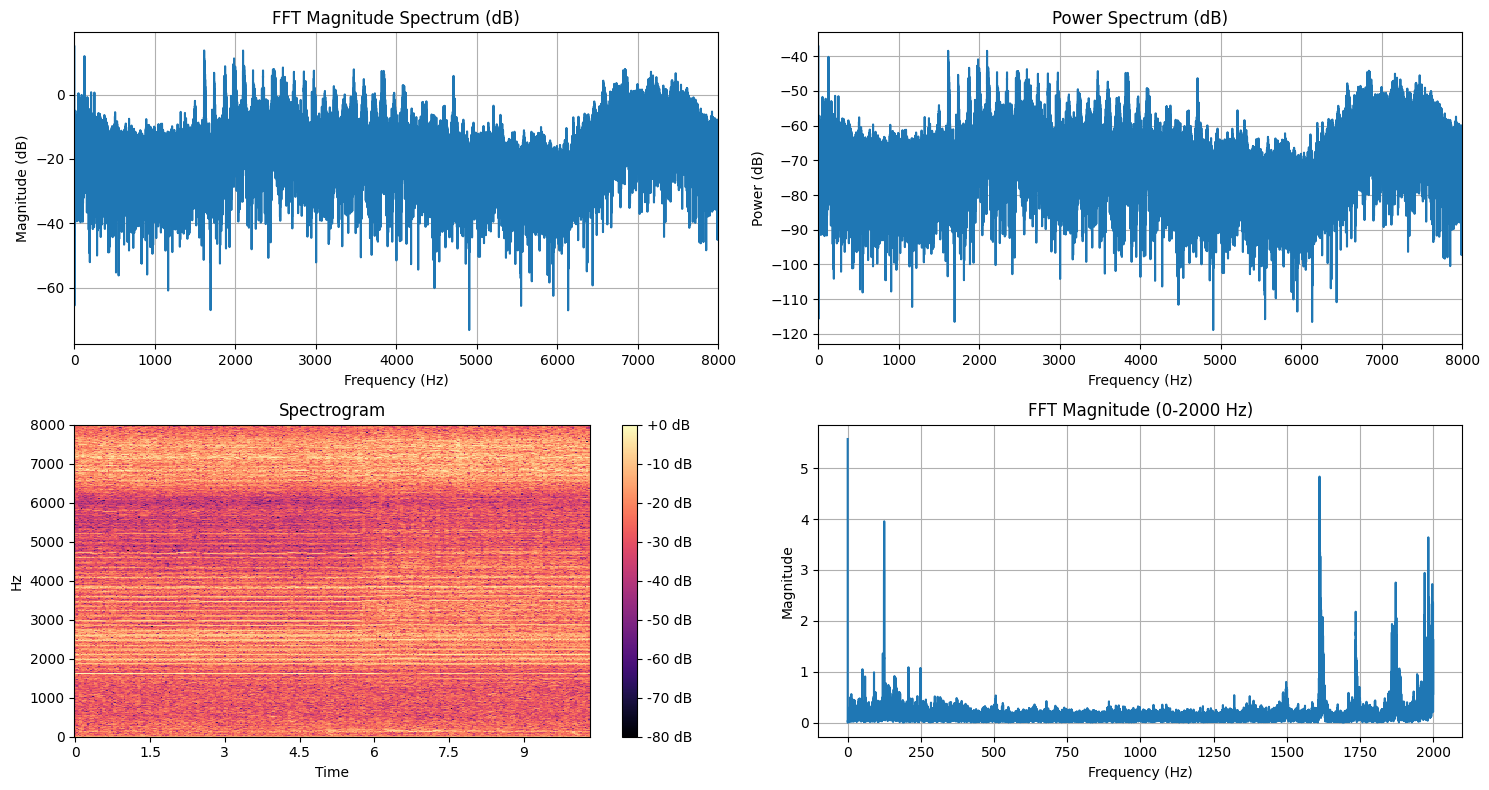

Menggunakan sampling rate: 16000 Hz
Frekuensi Nyquist: 8000.0 Hz
Wp normalized: [0.1875, 0.2875]
Ws normalized: [0.175, 0.3]
Orde minimum Butterworth: N = 12
Frekuensi kritis normalisasi Wn = [0.18749194 0.2875114 ]
Koefisien filter digital (b): [ 7.44699163e-11  0.00000000e+00 -8.93638996e-10  0.00000000e+00
  4.91501448e-09  0.00000000e+00 -1.63833816e-08  0.00000000e+00
  3.68626086e-08  0.00000000e+00 -5.89801737e-08  0.00000000e+00
  6.88102027e-08  0.00000000e+00 -5.89801737e-08  0.00000000e+00
  3.68626086e-08  0.00000000e+00 -1.63833816e-08  0.00000000e+00
  4.91501448e-09  0.00000000e+00 -8.93638996e-10  0.00000000e+00
  7.44699163e-11]
Koefisien filter digital (a): [ 1.00000000e+00 -1.60539610e+01  1.27830370e+02 -6.69725625e+02
  2.58606160e+03 -7.81918359e+03  1.92103828e+04 -3.92960964e+04
  6.80565969e+04 -1.00964748e+05  1.29344822e+05 -1.43848215e+05
  1.39296394e+05 -1.17564880e+05  8.63959435e+04 -5.51165029e+04
  3.03630319e+04 -1.43279098e+04  5.72433569e+03 -1.9041

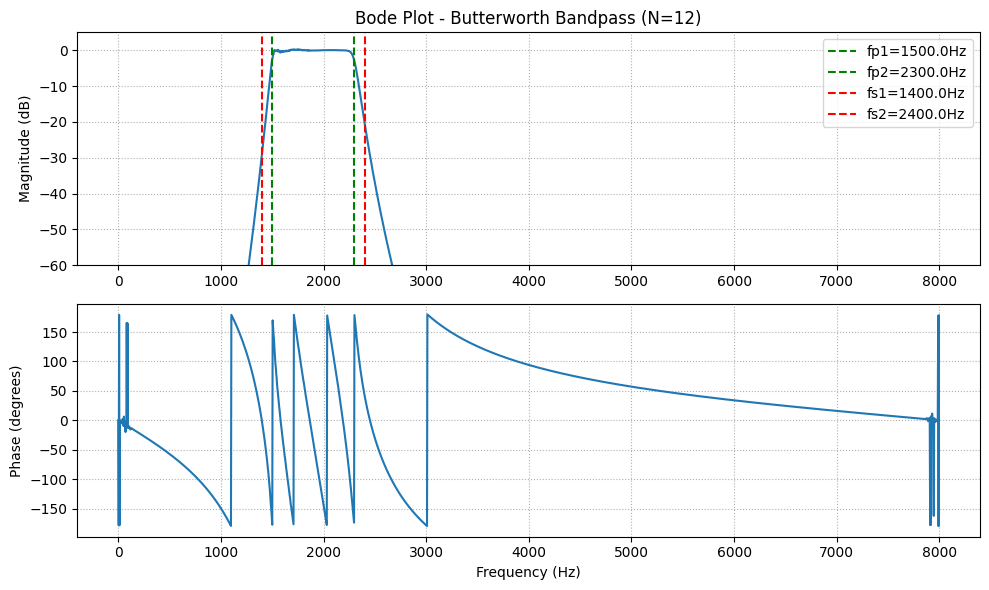

Panjang sinyal: 165200 samples
Durasi: 10.32 detik
Filter berhasil diterapkan!
Range sinyal asli: [-0.004303, 0.004578]
Range sinyal filtered: [-0.001634, 0.001578]


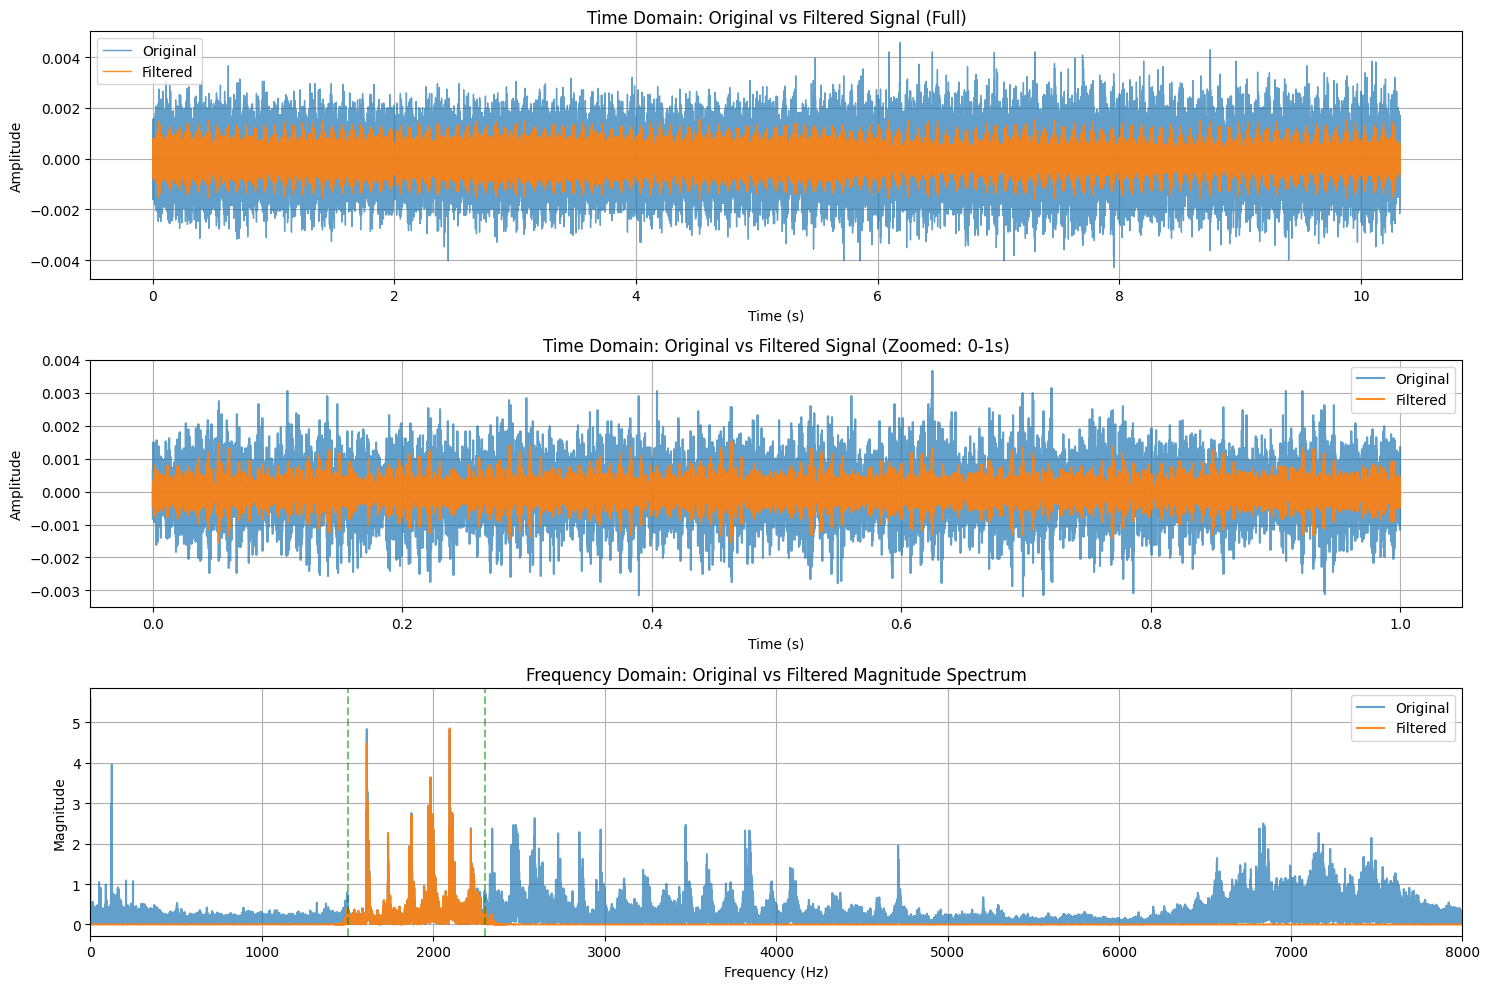


Menyimpan audio terfilter...
Output directory: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/
✓ File WAV berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1700_filtered_bandpass_1500-2300Hz.wav
  Verifikasi - Sample rate: 16000 Hz, Shape: (165200,)
✓ File WAV (librosa) berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1700_filtered_librosa.wav
✓ File FLAC berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1700_filtered.flac

Perbandingan File Audio:
Original - Sample rate: 16000 Hz, Duration: 10.32s
Filtered - Sample rate: 16000 Hz, Duration: 10.32s
RMS Original: 0.000836
RMS Filtered: 0.000358

Analisis Energi:
Energi sinyal asli: 1.15e-01
Energi sinyal filtered: 2.26e-02
Rasio energi (filtered/original): 0.1959

Analisis RMS:
RMS sinyal asli: 0.000836
RMS sinyal filtered: 0.000370
Rasio RMS (filtered/original): 0.4426

RINGKASAN FILE YAN

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from google.colab import drive
import os

def load_audio_file(file_path):
    """
    Load audio file using both scipy and librosa for compatibility
    Returns: audio data, sample rate
    """
    try:
        # Try with scipy first (for standard WAV files)
        sample_rate, audio_data = wavfile.read(file_path)

        # Convert to float if needed
        if audio_data.dtype == np.int16:
            audio_data = audio_data.astype(np.float32) / 32768.0
        elif audio_data.dtype == np.int32:
            audio_data = audio_data.astype(np.float32) / 2147483648.0

    except:
        # Fallback to librosa for other formats
        audio_data, sample_rate = librosa.load(file_path, sr=None)

    return audio_data, sample_rate

# Replace with your actual file path in Google Drive
file_path = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/1700.wav'
audio_data, fs = load_audio_file(file_path)

print(f"Audio loaded successfully!")
print(f"Sample rate: {fs} Hz")
print(f"Duration: {len(audio_data)/fs:.2f} seconds")
print(f"Data shape: {audio_data.shape}")

# Handle stereo audio by taking the first channel
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]
    print("Stereo audio detected, using first channel")

# Plot waveform (original code)
plt.figure(figsize=(15, 12))

# Subplot 1: Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_data, sr=fs)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# FFT Analysis
# Compute FFT
N = len(audio_data)
fft_data = np.fft.fft(audio_data)
fft_magnitude = np.abs(fft_data)
fft_phase = np.angle(fft_data)

# Create frequency axis
freqs = np.fft.fftfreq(N, 1/fs)

# Only take positive frequencies (first half)
positive_freqs = freqs[:N//2]
positive_magnitude = fft_magnitude[:N//2]

# Subplot 2: FFT Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(positive_freqs, positive_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, fs/2)  # Nyquist frequency limit

# Power Spectrum Analysis
# Method 1: Power Spectrum from FFT
power_spectrum = (fft_magnitude ** 2) / N
positive_power = power_spectrum[:N//2]

# Method 2: Power Spectral Density using Welch's method (more robust)
from scipy.signal import welch
f_welch, psd_welch = welch(audio_data, fs, nperseg=1024)

# Subplot 3: Power Spectrum
plt.subplot(3, 1, 3)
# Plot both methods for comparison
plt.semilogy(positive_freqs, positive_power, label='FFT Power Spectrum', alpha=0.7)
plt.semilogy(f_welch, psd_welch, label='Welch PSD', linewidth=2)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nFrequency Analysis Results:")
print(f"Frequency resolution: {fs/N:.2f} Hz")
print(f"Nyquist frequency: {fs/2:.2f} Hz")

# Find dominant frequencies
dominant_freq_idx = np.argmax(positive_magnitude[1:]) + 1  # Skip DC component
dominant_frequency = positive_freqs[dominant_freq_idx]
print(f"Dominant frequency: {dominant_frequency:.2f} Hz")

# Find top 5 frequencies
top_5_indices = np.argsort(positive_magnitude[1:])[-5:][::-1] + 1  # Skip DC, get top 5
print(f"\nTop 5 dominant frequencies:")
for i, idx in enumerate(top_5_indices):
    freq = positive_freqs[idx]
    magnitude = positive_magnitude[idx]
    print(f"{i+1}. {freq:.2f} Hz (Magnitude: {magnitude:.2e})")

# Optional: Create a more detailed frequency analysis plot
plt.figure(figsize=(15, 8))

# Plot 1: FFT Magnitude in dB scale
plt.subplot(2, 2, 1)
magnitude_db = 20 * np.log10(positive_magnitude + 1e-12)  # Add small value to avoid log(0)
plt.plot(positive_freqs, magnitude_db)
plt.title('FFT Magnitude Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 2: Power Spectrum in dB scale
plt.subplot(2, 2, 2)
power_db = 10 * np.log10(positive_power + 1e-12)
plt.plot(positive_freqs, power_db)
plt.title('Power Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 3: Spectrogram
plt.subplot(2, 2, 3)
D = librosa.stft(audio_data)
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(DB, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot 4: Zoomed view of low frequencies (0-2000 Hz)
plt.subplot(2, 2, 4)
freq_limit = 2000
limit_idx = np.where(positive_freqs <= freq_limit)[0][-1]
plt.plot(positive_freqs[:limit_idx], positive_magnitude[:limit_idx])
plt.title(f'FFT Magnitude (0-{freq_limit} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# BAGIAN FILTER - DIPERBAIKI
# =========================================

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# =========================================
# 1. Definisikan parameter utama
# =========================================

# Gunakan sampling rate dari audio yang dimuat
print(f"Menggunakan sampling rate: {fs} Hz")

fp1, fp2 = 1500.0, 2300.0   # [Hz] batas passband
fs1, fs2 = 1400.0, 2400.0   # [Hz] batas stopband

Rp = 3.0    # Ripple di passband (dB)
Rs = 20.0   # Atenuasi di stopband (dB)

# =========================================
# 2. Normalisasi frekuensi (terhadap Nyquist)
# =========================================

nyq = fs / 2.0
Wp = [fp1 / nyq, fp2 / nyq]
Ws = [fs1 / nyq, fs2 / nyq]

print(f"Frekuensi Nyquist: {nyq} Hz")
print(f"Wp normalized: {Wp}")
print(f"Ws normalized: {Ws}")

# =========================================
# 3. Hitung orde minimum (N) dan Wn via buttord
# =========================================

N, Wn = sig.buttord(wp=Wp, ws=Ws, gpass=Rp, gstop=Rs)
print(f"Orde minimum Butterworth: N = {N}")
print(f"Frekuensi kritis normalisasi Wn = {Wn}")

# =========================================
# 4. Dapatkan koefisien filter (b, a) - LANGSUNG DIGITAL
# =========================================

# Gunakan butter langsung untuk mendapatkan filter digital
b, a = sig.butter(N, Wn, btype='bandpass')
print("Koefisien filter digital (b):", b)
print("Koefisien filter digital (a):", a)

# =========================================
# 5. Plot respons frekuensi filter
# =========================================

w, h = sig.freqz(b, a, worN=2048, fs=fs)

plt.figure(figsize=(10, 6))

# Plot magnitude
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title(f'Bode Plot - Butterworth Bandpass (N={N})')
plt.ylabel('Magnitude (dB)')
plt.axvline(fp1, color='green', linestyle='--', label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', label=f'fp2={fp2}Hz')
plt.axvline(fs1, color='red', linestyle='--', label=f'fs1={fs1}Hz')
plt.axvline(fs2, color='red', linestyle='--', label=f'fs2={fs2}Hz')
plt.ylim(-60, 5)
plt.grid(True, which='both', ls=':')
plt.legend()

# Plot phase
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h, deg=True))
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

# =========================================
# 6. TERAPKAN FILTER KE SINYAL AUDIO
# =========================================

# Definisikan variabel yang diperlukan untuk plotting
y = audio_data # Sinyal asli
t = np.arange(len(y)) / fs # Array waktu

print(f"Panjang sinyal: {len(y)} samples")
print(f"Durasi: {len(y)/fs:.2f} detik")

# Terapkan filter menggunakan filtfilt (zero-phase filtering)
try:
    yfilt = signal.filtfilt(b, a, y)
    print("Filter berhasil diterapkan!")

    # Cek apakah hasil filter valid
    if np.any(np.isnan(yfilt)) or np.any(np.isinf(yfilt)):
        print("WARNING: Filter menghasilkan nilai NaN atau Inf!")
    else:
        print(f"Range sinyal asli: [{np.min(y):.6f}, {np.max(y):.6f}]")
        print(f"Range sinyal filtered: [{np.min(yfilt):.6f}, {np.max(yfilt):.6f}]")

except Exception as e:
    print(f"Error saat menerapkan filter: {e}")
    # Fallback: gunakan lfilter biasa
    yfilt = signal.lfilter(b, a, y)
    print("Menggunakan lfilter sebagai alternatif")

# =========================================
# 7. PLOT PERBANDINGAN SINYAL
# =========================================

# Plot Sinyal Input x(n) dan Output terfilter y(n) dalam domain waktu
plt.figure(figsize=(15, 10))

# Plot 1: Sinyal lengkap
plt.subplot(3, 1, 1)
plt.plot(t, y, label='Original', alpha=0.7, linewidth=1)
plt.plot(t, yfilt, label='Filtered', alpha=0.9, linewidth=1)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Time Domain: Original vs Filtered Signal (Full)")
plt.legend()
plt.grid(True)

# Plot 2: Zoom ke bagian awal (0-1 detik)
plt.subplot(3, 1, 2)
zoom_samples = int(1.0 * fs)  # 1 detik pertama
if zoom_samples < len(t):
    plt.plot(t[:zoom_samples], y[:zoom_samples], label='Original', alpha=0.7)
    plt.plot(t[:zoom_samples], yfilt[:zoom_samples], label='Filtered', alpha=0.9)
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.title("Time Domain: Original vs Filtered Signal (Zoomed: 0-1s)")
    plt.legend()
    plt.grid(True)

# Plot 3: Spektrum frekuensi
plt.subplot(3, 1, 3)

# FFT sinyal asli dan terfilter
yhat = np.fft.fft(y)
yfilthat = np.fft.fft(yfilt)

# Buat sumbu frekuensi
freqs_fft = np.fft.fftfreq(len(y), d=1.0/fs)

# Plot hanya frekuensi positif
positive_idx = freqs_fft >= 0
freqs_positive = freqs_fft[positive_idx]
yhat_positive = yhat[positive_idx]
yfilthat_positive = yfilthat[positive_idx]

plt.plot(freqs_positive, np.abs(yhat_positive), label='Original', alpha=0.7)
plt.plot(freqs_positive, np.abs(yfilthat_positive), label='Filtered', alpha=0.9)
plt.xlim([0, fs/2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain: Original vs Filtered Magnitude Spectrum")
plt.legend()
plt.grid(True)

# Tambahkan garis vertikal untuk menunjukkan batas filter
plt.axvline(fp1, color='green', linestyle='--', alpha=0.5, label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', alpha=0.5, label=f'fp2={fp2}Hz')

plt.tight_layout()
plt.show()

# =========================================
# 8. MENYIMPAN AUDIO TERFILTER
# =========================================

# Persiapkan data audio untuk disimpan
def prepare_audio_for_saving(audio_data, target_dtype='int16'):
    """
    Persiapkan data audio untuk disimpan dengan normalisasi yang tepat
    """
    # Pastikan audio dalam range [-1, 1]
    max_val = np.max(np.abs(audio_data))
    if max_val > 1.0:
        audio_normalized = audio_data / max_val
        print(f"Audio dinormalisasi: max value {max_val:.6f} -> 1.0")
    else:
        audio_normalized = audio_data

    # Konversi ke format integer sesuai target
    if target_dtype == 'int16':
        audio_int = (audio_normalized * 32767).astype(np.int16)
    elif target_dtype == 'int32':
        audio_int = (audio_normalized * 2147483647).astype(np.int32)
    else:
        audio_int = audio_normalized.astype(np.float32)

    return audio_int

# Tentukan path untuk menyimpan file
output_dir = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/'
os.makedirs(output_dir, exist_ok=True)

# Nama file output
base_filename = os.path.splitext(os.path.basename(file_path))[0]
output_filename_wav = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.wav"
output_filename_mp3 = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.mp3"

output_path_wav = os.path.join(output_dir, output_filename_wav)
output_path_mp3 = os.path.join(output_dir, output_filename_mp3)

print(f"\nMenyimpan audio terfilter...")
print(f"Output directory: {output_dir}")

# =========================================
# Metode 1: Simpan sebagai WAV menggunakan scipy.io.wavfile
# =========================================

try:
    # Persiapkan data untuk WAV (16-bit integer)
    yfilt_wav = prepare_audio_for_saving(yfilt, 'int16')

    # Simpan file WAV
    wavfile.write(output_path_wav, int(fs), yfilt_wav)
    print(f"✓ File WAV berhasil disimpan: {output_path_wav}")

    # Verifikasi file yang disimpan
    verify_fs, verify_data = wavfile.read(output_path_wav)
    print(f"  Verifikasi - Sample rate: {verify_fs} Hz, Shape: {verify_data.shape}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV: {e}")

# =========================================
# Metode 2: Simpan sebagai WAV menggunakan librosa
# =========================================

try:
    # Librosa expects float32 data in range [-1, 1]
    yfilt_librosa = prepare_audio_for_saving(yfilt, 'float32')

    # Path alternatif untuk librosa
    output_path_wav_librosa = os.path.join(output_dir, f"{base_filename}_filtered_librosa.wav")

    # Simpan menggunakan librosa
    import soundfile as sf  # librosa menggunakan soundfile di backend
    sf.write(output_path_wav_librosa, yfilt_librosa, int(fs))
    print(f"✓ File WAV (librosa) berhasil disimpan: {output_path_wav_librosa}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV dengan librosa: {e}")
    print("  Note: Pastikan soundfile terinstall: !pip install soundfile")

# =========================================
# Metode 3: Simpan dalam format lain (opsional)
# =========================================

# Jika ingin menyimpan dalam format lain, bisa menggunakan librosa
try:
    # Simpan sebagai FLAC (lossless compression)
    output_path_flac = os.path.join(output_dir, f"{base_filename}_filtered.flac")
    yfilt_flac = prepare_audio_for_saving(yfilt, 'float32')
    sf.write(output_path_flac, yfilt_flac, int(fs), format='FLAC')
    print(f"✓ File FLAC berhasil disimpan: {output_path_flac}")

except Exception as e:
    print(f"✗ Error menyimpan file FLAC: {e}")

# =========================================
# Fungsi untuk membandingkan file asli dan terfilter
# =========================================

def compare_audio_files(original_path, filtered_path):
    """
    Bandingkan file audio asli dan terfilter
    """
    try:
        # Load kedua file
        orig_data, orig_fs = load_audio_file(original_path)
        filt_data, filt_fs = load_audio_file(filtered_path)

        print(f"\nPerbandingan File Audio:")
        print(f"Original - Sample rate: {orig_fs} Hz, Duration: {len(orig_data)/orig_fs:.2f}s")
        print(f"Filtered - Sample rate: {filt_fs} Hz, Duration: {len(filt_data)/filt_fs:.2f}s")
        print(f"RMS Original: {np.sqrt(np.mean(orig_data**2)):.6f}")
        print(f"RMS Filtered: {np.sqrt(np.mean(filt_data**2)):.6f}")

        return True
    except Exception as e:
        print(f"Error membandingkan file: {e}")
        return False

# Bandingkan file asli dengan file terfilter yang disimpan
if os.path.exists(output_path_wav):
    compare_audio_files(file_path, output_path_wav)

# =========================================
# Membuat fungsi untuk batch processing (opsional)
# =========================================

def batch_filter_audio(input_dir, output_dir, filter_params):
    """
    Batch processing untuk memfilter multiple file audio

    Parameters:
    - input_dir: direktori input yang berisi file audio
    - output_dir: direktori output untuk menyimpan hasil filter
    - filter_params: dictionary berisi parameter filter
    """

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Format file audio yang didukung
    supported_formats = ['.wav', '.mp3', '.flac', '.m4a']

    # Cari semua file audio di direktori input
    audio_files = []
    for ext in supported_formats:
        audio_files.extend([f for f in os.listdir(input_dir) if f.lower().endswith(ext)])

    print(f"Ditemukan {len(audio_files)} file audio untuk diproses...")

    for i, filename in enumerate(audio_files):
        try:
            print(f"\nMemproses file {i+1}/{len(audio_files)}: {filename}")

            # Load audio
            input_path = os.path.join(input_dir, filename)
            audio_data, fs = load_audio_file(input_path)

            # Handle stereo
            if len(audio_data.shape) > 1:
                audio_data = audio_data[:, 0]

            # Design filter dengan parameter yang diberikan
            nyq = fs / 2.0
            Wp = [filter_params['fp1'] / nyq, filter_params['fp2'] / nyq]
            Ws = [filter_params['fs1'] / nyq, filter_params['fs2'] / nyq]

            N, Wn = sig.buttord(wp=Wp, ws=Ws,
                               gpass=filter_params['Rp'],
                               gstop=filter_params['Rs'])
            b, a = sig.butter(N, Wn, btype='bandpass')

            # Terapkan filter
            filtered_audio = signal.filtfilt(b, a, audio_data)

            # Simpan hasil filter
            base_name = os.path.splitext(filename)[0]
            output_filename = f"{base_name}_filtered_bp_{int(filter_params['fp1'])}-{int(filter_params['fp2'])}Hz.wav"
            output_path = os.path.join(output_dir, output_filename)

            # Prepare dan simpan
            filtered_for_save = prepare_audio_for_saving(filtered_audio, 'int16')
            wavfile.write(output_path, int(fs), filtered_for_save)

            print(f"  ✓ Berhasil: {output_filename}")

        except Exception as e:
            print(f"  ✗ Error memproses {filename}: {e}")

    print(f"\nBatch processing selesai!")

# Contoh penggunaan batch processing
# Uncomment baris di bawah jika ingin memproses semua file dalam direktori
"""
batch_params = {
    'fp1': fp1, 'fp2': fp2,
    'fs1': fs1, 'fs2': fs2,
    'Rp': Rp, 'Rs': Rs
}

input_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/'
output_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered_batch/'

# batch_filter_audio(input_directory, output_directory, batch_params)
"""

# =========================================
# 9. ANALISIS TAMBAHAN
# =========================================

# Hitung energi sinyal
energy_original = np.sum(y**2)
energy_filtered = np.sum(yfilt**2)

print(f"\nAnalisis Energi:")
print(f"Energi sinyal asli: {energy_original:.2e}")
print(f"Energi sinyal filtered: {energy_filtered:.2e}")
print(f"Rasio energi (filtered/original): {energy_filtered/energy_original:.4f}")

# Analisis RMS
rms_original = np.sqrt(np.mean(y**2))
rms_filtered = np.sqrt(np.mean(yfilt**2))

print(f"\nAnalisis RMS:")
print(f"RMS sinyal asli: {rms_original:.6f}")
print(f"RMS sinyal filtered: {rms_filtered:.6f}")
print(f"Rasio RMS (filtered/original): {rms_filtered/rms_original:.4f}")

# Informasi file yang disimpan
print(f"\n" + "="*50)
print("RINGKASAN FILE YANG DISIMPAN:")
print("="*50)
if os.path.exists(output_path_wav):
    file_size = os.path.getsize(output_path_wav)
    print(f"✓ {output_filename_wav}")
    print(f"  Size: {file_size/1024:.1f} KB")
    print(f"  Path: {output_path_wav}")

print(f"\nParameter Filter yang Digunakan:")
print(f"- Jenis: Butterworth Bandpass")
print(f"- Orde: {N}")
print(f"- Passband: {fp1}-{fp2} Hz")
print(f"- Stopband: {fs1}-{fs2} Hz")
print(f"- Ripple passband: {Rp} dB")
print(f"- Atenuasi stopband: {Rs} dB")

Audio loaded successfully!
Sample rate: 16000 Hz
Duration: 10.25 seconds
Data shape: (164000, 2)
Stereo audio detected, using first channel


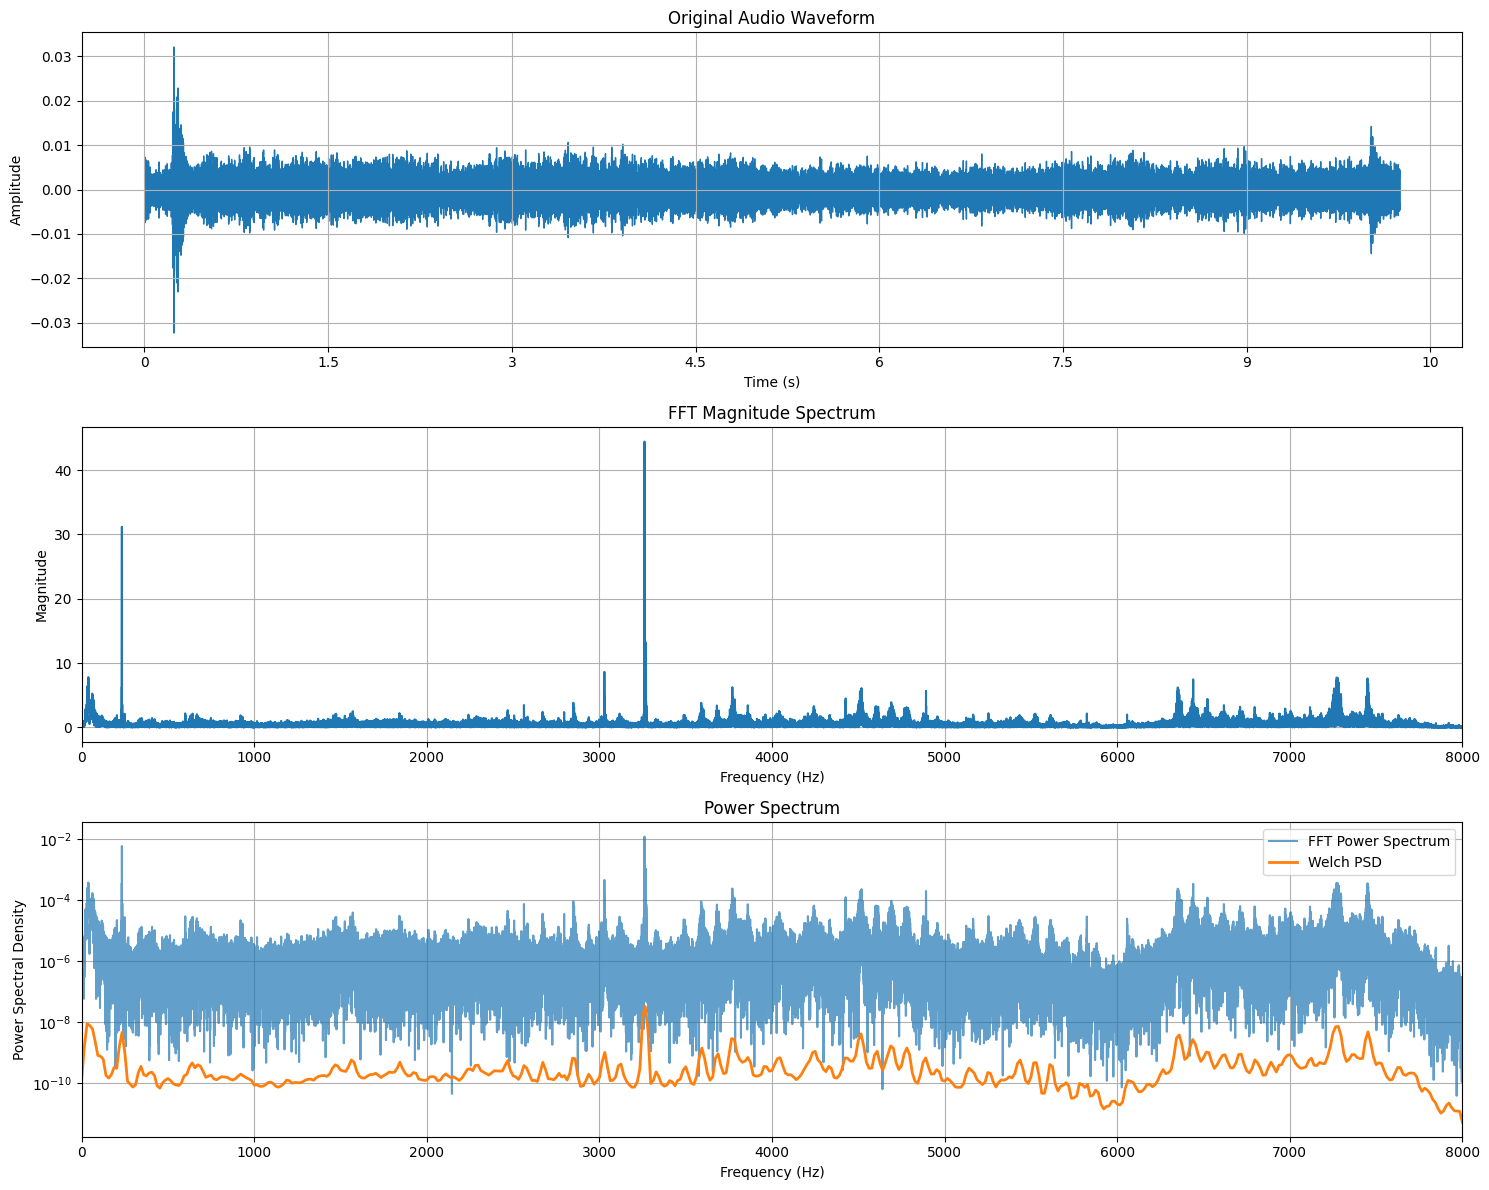


Frequency Analysis Results:
Frequency resolution: 0.10 Hz
Nyquist frequency: 8000.00 Hz
Dominant frequency: 3261.17 Hz

Top 5 dominant frequencies:
1. 3261.17 Hz (Magnitude: 4.44e+01)
2. 3261.66 Hz (Magnitude: 3.93e+01)
3. 3261.46 Hz (Magnitude: 3.53e+01)
4. 233.07 Hz (Magnitude: 3.12e+01)
5. 3261.27 Hz (Magnitude: 2.60e+01)


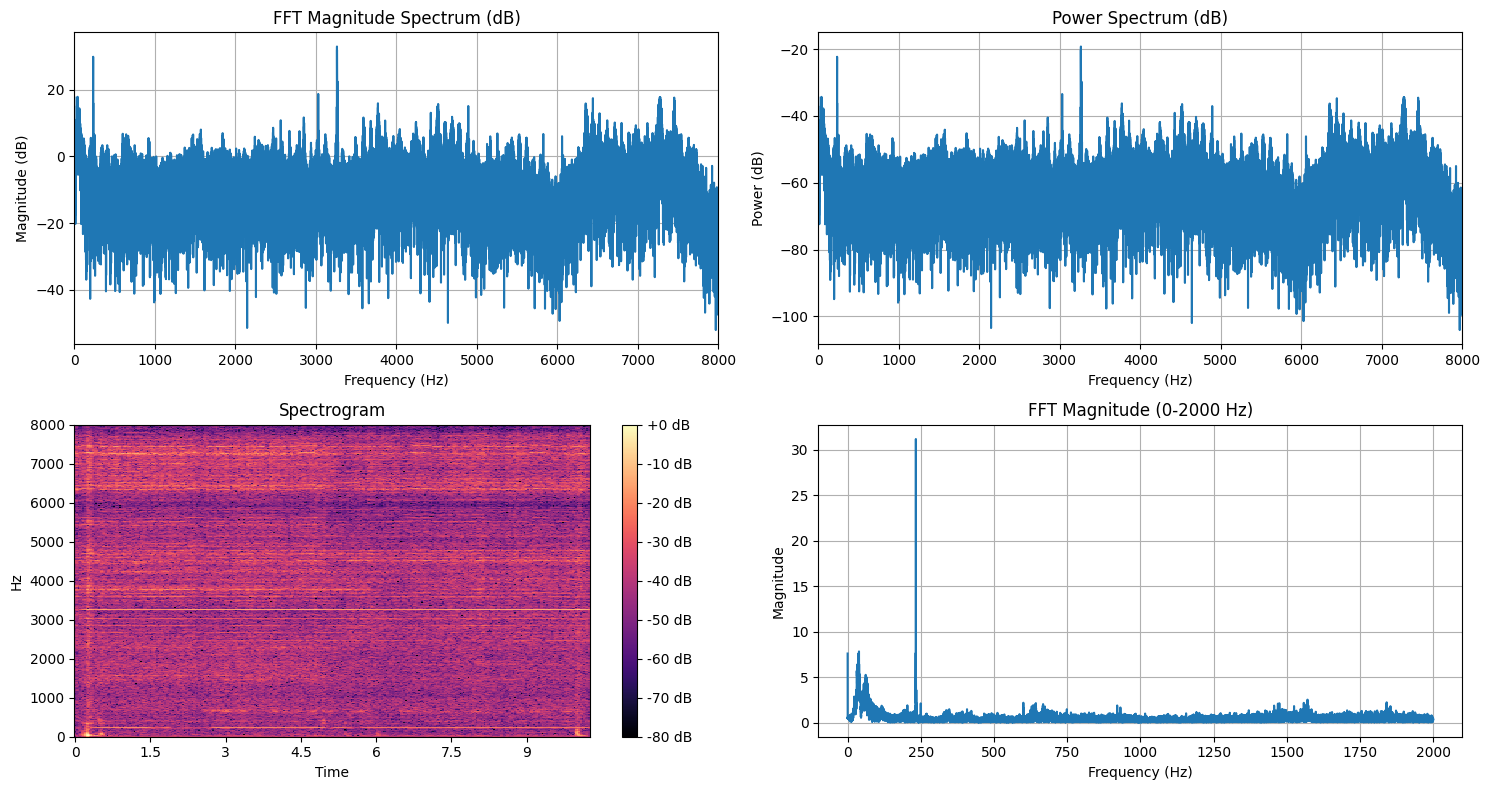

Menggunakan sampling rate: 16000 Hz
Frekuensi Nyquist: 8000.0 Hz
Wp normalized: [0.36875, 0.4125]
Ws normalized: [0.35625, 0.425]
Orde minimum Butterworth: N = 6
Frekuensi kritis normalisasi Wn = [0.36874158 0.41250884]
Koefisien filter digital (b): [ 8.17051705e-08  0.00000000e+00 -4.90231023e-07  0.00000000e+00
  1.22557756e-06  0.00000000e+00 -1.63410341e-06  0.00000000e+00
  1.22557756e-06  0.00000000e+00 -4.90231023e-07  0.00000000e+00
  8.17051705e-08]
Koefisien filter digital (a): [  1.          -3.87287306  11.72094273 -23.04971889  37.92519892
 -47.7186948   51.3870715  -43.67305715  31.76705998 -17.66928289
   8.2228993   -2.48630333   0.58755442]


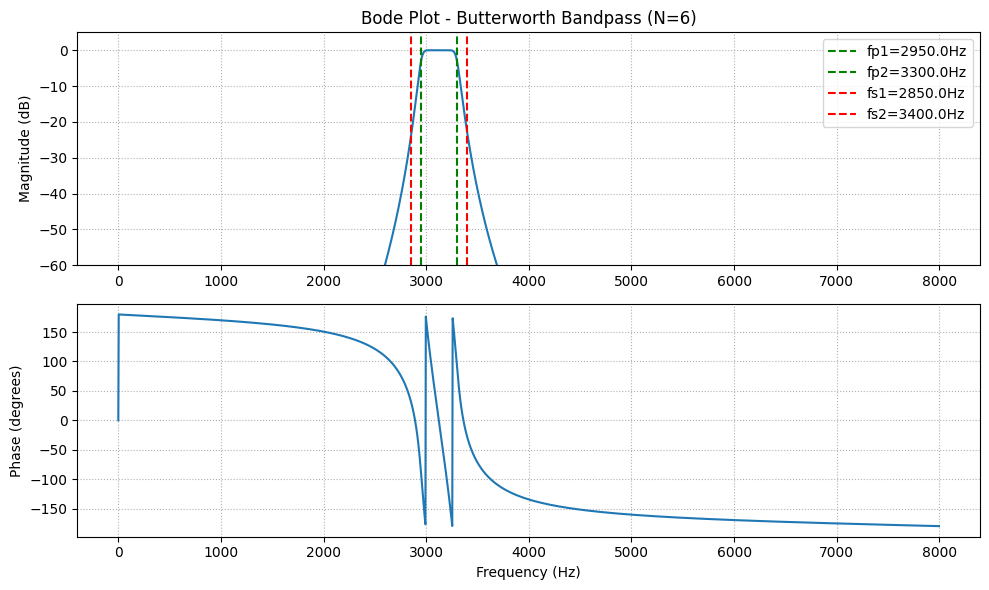

Panjang sinyal: 164000 samples
Durasi: 10.25 detik
Filter berhasil diterapkan!
Range sinyal asli: [-0.020935, 0.032227]
Range sinyal filtered: [-0.003737, 0.003249]


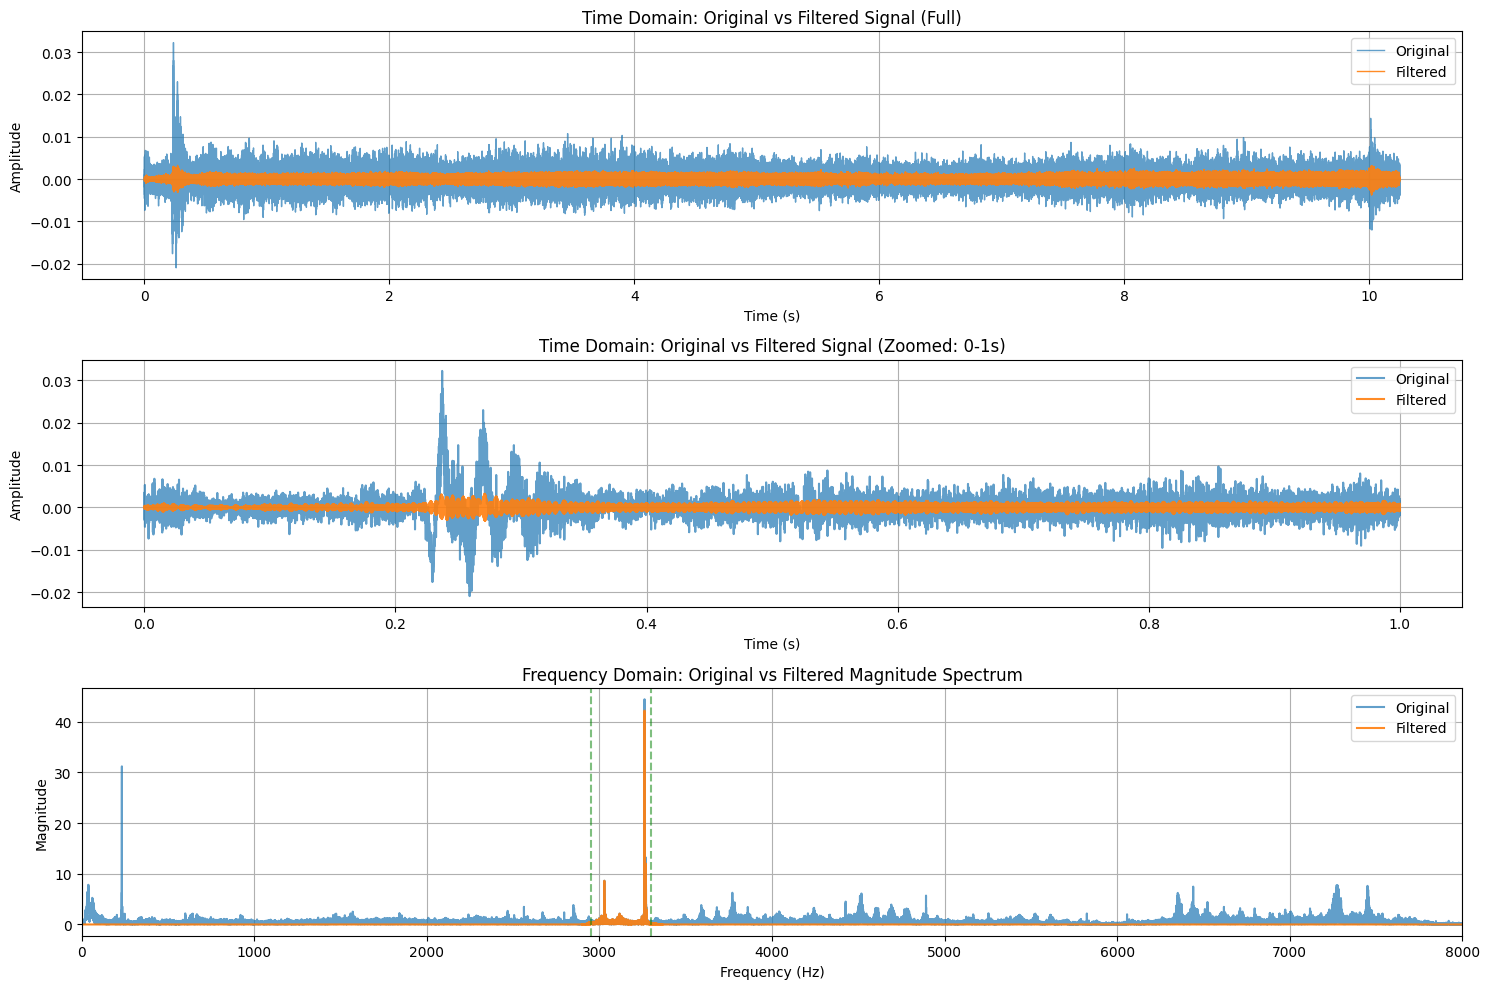


Menyimpan audio terfilter...
Output directory: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/
✓ File WAV berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1550_filtered_bandpass_2950-3300Hz.wav
  Verifikasi - Sample rate: 16000 Hz, Shape: (164000,)
✓ File WAV (librosa) berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1550_filtered_librosa.wav
✓ File FLAC berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1550_filtered.flac

Perbandingan File Audio:
Original - Sample rate: 16000 Hz, Duration: 10.25s
Filtered - Sample rate: 16000 Hz, Duration: 10.25s
RMS Original: 0.002089
RMS Filtered: 0.000874

Analisis Energi:
Energi sinyal asli: 7.15e-01
Energi sinyal filtered: 1.29e-01
Rasio energi (filtered/original): 0.1804

Analisis RMS:
RMS sinyal asli: 0.002089
RMS sinyal filtered: 0.000887
Rasio RMS (filtered/original): 0.4247

RINGKASAN FILE YAN

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from google.colab import drive
import os

def load_audio_file(file_path):
    """
    Load audio file using both scipy and librosa for compatibility
    Returns: audio data, sample rate
    """
    try:
        # Try with scipy first (for standard WAV files)
        sample_rate, audio_data = wavfile.read(file_path)

        # Convert to float if needed
        if audio_data.dtype == np.int16:
            audio_data = audio_data.astype(np.float32) / 32768.0
        elif audio_data.dtype == np.int32:
            audio_data = audio_data.astype(np.float32) / 2147483648.0

    except:
        # Fallback to librosa for other formats
        audio_data, sample_rate = librosa.load(file_path, sr=None)

    return audio_data, sample_rate

# Replace with your actual file path in Google Drive
file_path = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Healthy/M1/1550.wav'
audio_data, fs = load_audio_file(file_path)

print(f"Audio loaded successfully!")
print(f"Sample rate: {fs} Hz")
print(f"Duration: {len(audio_data)/fs:.2f} seconds")
print(f"Data shape: {audio_data.shape}")

# Handle stereo audio by taking the first channel
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]
    print("Stereo audio detected, using first channel")

# Plot waveform (original code)
plt.figure(figsize=(15, 12))

# Subplot 1: Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_data, sr=fs)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# FFT Analysis
# Compute FFT
N = len(audio_data)
fft_data = np.fft.fft(audio_data)
fft_magnitude = np.abs(fft_data)
fft_phase = np.angle(fft_data)

# Create frequency axis
freqs = np.fft.fftfreq(N, 1/fs)

# Only take positive frequencies (first half)
positive_freqs = freqs[:N//2]
positive_magnitude = fft_magnitude[:N//2]

# Subplot 2: FFT Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(positive_freqs, positive_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, fs/2)  # Nyquist frequency limit

# Power Spectrum Analysis
# Method 1: Power Spectrum from FFT
power_spectrum = (fft_magnitude ** 2) / N
positive_power = power_spectrum[:N//2]

# Method 2: Power Spectral Density using Welch's method (more robust)
from scipy.signal import welch
f_welch, psd_welch = welch(audio_data, fs, nperseg=1024)

# Subplot 3: Power Spectrum
plt.subplot(3, 1, 3)
# Plot both methods for comparison
plt.semilogy(positive_freqs, positive_power, label='FFT Power Spectrum', alpha=0.7)
plt.semilogy(f_welch, psd_welch, label='Welch PSD', linewidth=2)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nFrequency Analysis Results:")
print(f"Frequency resolution: {fs/N:.2f} Hz")
print(f"Nyquist frequency: {fs/2:.2f} Hz")

# Find dominant frequencies
dominant_freq_idx = np.argmax(positive_magnitude[1:]) + 1  # Skip DC component
dominant_frequency = positive_freqs[dominant_freq_idx]
print(f"Dominant frequency: {dominant_frequency:.2f} Hz")

# Find top 5 frequencies
top_5_indices = np.argsort(positive_magnitude[1:])[-5:][::-1] + 1  # Skip DC, get top 5
print(f"\nTop 5 dominant frequencies:")
for i, idx in enumerate(top_5_indices):
    freq = positive_freqs[idx]
    magnitude = positive_magnitude[idx]
    print(f"{i+1}. {freq:.2f} Hz (Magnitude: {magnitude:.2e})")

# Optional: Create a more detailed frequency analysis plot
plt.figure(figsize=(15, 8))

# Plot 1: FFT Magnitude in dB scale
plt.subplot(2, 2, 1)
magnitude_db = 20 * np.log10(positive_magnitude + 1e-12)  # Add small value to avoid log(0)
plt.plot(positive_freqs, magnitude_db)
plt.title('FFT Magnitude Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 2: Power Spectrum in dB scale
plt.subplot(2, 2, 2)
power_db = 10 * np.log10(positive_power + 1e-12)
plt.plot(positive_freqs, power_db)
plt.title('Power Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 3: Spectrogram
plt.subplot(2, 2, 3)
D = librosa.stft(audio_data)
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(DB, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot 4: Zoomed view of low frequencies (0-2000 Hz)
plt.subplot(2, 2, 4)
freq_limit = 2000
limit_idx = np.where(positive_freqs <= freq_limit)[0][-1]
plt.plot(positive_freqs[:limit_idx], positive_magnitude[:limit_idx])
plt.title(f'FFT Magnitude (0-{freq_limit} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# BAGIAN FILTER - DIPERBAIKI
# =========================================

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# =========================================
# 1. Definisikan parameter utama
# =========================================

# Gunakan sampling rate dari audio yang dimuat
print(f"Menggunakan sampling rate: {fs} Hz")

fp1, fp2 = 2950.0, 3300.0   # [Hz] batas passband
fs1, fs2 = 2850.0, 3400.0   # [Hz] batas stopband

Rp = 3.0    # Ripple di passband (dB)
Rs = 20.0   # Atenuasi di stopband (dB)

# =========================================
# 2. Normalisasi frekuensi (terhadap Nyquist)
# =========================================

nyq = fs / 2.0
Wp = [fp1 / nyq, fp2 / nyq]
Ws = [fs1 / nyq, fs2 / nyq]

print(f"Frekuensi Nyquist: {nyq} Hz")
print(f"Wp normalized: {Wp}")
print(f"Ws normalized: {Ws}")

# =========================================
# 3. Hitung orde minimum (N) dan Wn via buttord
# =========================================

N, Wn = sig.buttord(wp=Wp, ws=Ws, gpass=Rp, gstop=Rs)
print(f"Orde minimum Butterworth: N = {N}")
print(f"Frekuensi kritis normalisasi Wn = {Wn}")

# =========================================
# 4. Dapatkan koefisien filter (b, a) - LANGSUNG DIGITAL
# =========================================

# Gunakan butter langsung untuk mendapatkan filter digital
b, a = sig.butter(N, Wn, btype='bandpass')
print("Koefisien filter digital (b):", b)
print("Koefisien filter digital (a):", a)

# =========================================
# 5. Plot respons frekuensi filter
# =========================================

w, h = sig.freqz(b, a, worN=2048, fs=fs)

plt.figure(figsize=(10, 6))

# Plot magnitude
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title(f'Bode Plot - Butterworth Bandpass (N={N})')
plt.ylabel('Magnitude (dB)')
plt.axvline(fp1, color='green', linestyle='--', label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', label=f'fp2={fp2}Hz')
plt.axvline(fs1, color='red', linestyle='--', label=f'fs1={fs1}Hz')
plt.axvline(fs2, color='red', linestyle='--', label=f'fs2={fs2}Hz')
plt.ylim(-60, 5)
plt.grid(True, which='both', ls=':')
plt.legend()

# Plot phase
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h, deg=True))
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

# =========================================
# 6. TERAPKAN FILTER KE SINYAL AUDIO
# =========================================

# Definisikan variabel yang diperlukan untuk plotting
y = audio_data # Sinyal asli
t = np.arange(len(y)) / fs # Array waktu

print(f"Panjang sinyal: {len(y)} samples")
print(f"Durasi: {len(y)/fs:.2f} detik")

# Terapkan filter menggunakan filtfilt (zero-phase filtering)
try:
    yfilt = signal.filtfilt(b, a, y)
    print("Filter berhasil diterapkan!")

    # Cek apakah hasil filter valid
    if np.any(np.isnan(yfilt)) or np.any(np.isinf(yfilt)):
        print("WARNING: Filter menghasilkan nilai NaN atau Inf!")
    else:
        print(f"Range sinyal asli: [{np.min(y):.6f}, {np.max(y):.6f}]")
        print(f"Range sinyal filtered: [{np.min(yfilt):.6f}, {np.max(yfilt):.6f}]")

except Exception as e:
    print(f"Error saat menerapkan filter: {e}")
    # Fallback: gunakan lfilter biasa
    yfilt = signal.lfilter(b, a, y)
    print("Menggunakan lfilter sebagai alternatif")

# =========================================
# 7. PLOT PERBANDINGAN SINYAL
# =========================================

# Plot Sinyal Input x(n) dan Output terfilter y(n) dalam domain waktu
plt.figure(figsize=(15, 10))

# Plot 1: Sinyal lengkap
plt.subplot(3, 1, 1)
plt.plot(t, y, label='Original', alpha=0.7, linewidth=1)
plt.plot(t, yfilt, label='Filtered', alpha=0.9, linewidth=1)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Time Domain: Original vs Filtered Signal (Full)")
plt.legend()
plt.grid(True)

# Plot 2: Zoom ke bagian awal (0-1 detik)
plt.subplot(3, 1, 2)
zoom_samples = int(1.0 * fs)  # 1 detik pertama
if zoom_samples < len(t):
    plt.plot(t[:zoom_samples], y[:zoom_samples], label='Original', alpha=0.7)
    plt.plot(t[:zoom_samples], yfilt[:zoom_samples], label='Filtered', alpha=0.9)
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.title("Time Domain: Original vs Filtered Signal (Zoomed: 0-1s)")
    plt.legend()
    plt.grid(True)

# Plot 3: Spektrum frekuensi
plt.subplot(3, 1, 3)

# FFT sinyal asli dan terfilter
yhat = np.fft.fft(y)
yfilthat = np.fft.fft(yfilt)

# Buat sumbu frekuensi
freqs_fft = np.fft.fftfreq(len(y), d=1.0/fs)

# Plot hanya frekuensi positif
positive_idx = freqs_fft >= 0
freqs_positive = freqs_fft[positive_idx]
yhat_positive = yhat[positive_idx]
yfilthat_positive = yfilthat[positive_idx]

plt.plot(freqs_positive, np.abs(yhat_positive), label='Original', alpha=0.7)
plt.plot(freqs_positive, np.abs(yfilthat_positive), label='Filtered', alpha=0.9)
plt.xlim([0, fs/2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain: Original vs Filtered Magnitude Spectrum")
plt.legend()
plt.grid(True)

# Tambahkan garis vertikal untuk menunjukkan batas filter
plt.axvline(fp1, color='green', linestyle='--', alpha=0.5, label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', alpha=0.5, label=f'fp2={fp2}Hz')

plt.tight_layout()
plt.show()

# =========================================
# 8. MENYIMPAN AUDIO TERFILTER
# =========================================

# Persiapkan data audio untuk disimpan
def prepare_audio_for_saving(audio_data, target_dtype='int16'):
    """
    Persiapkan data audio untuk disimpan dengan normalisasi yang tepat
    """
    # Pastikan audio dalam range [-1, 1]
    max_val = np.max(np.abs(audio_data))
    if max_val > 1.0:
        audio_normalized = audio_data / max_val
        print(f"Audio dinormalisasi: max value {max_val:.6f} -> 1.0")
    else:
        audio_normalized = audio_data

    # Konversi ke format integer sesuai target
    if target_dtype == 'int16':
        audio_int = (audio_normalized * 32767).astype(np.int16)
    elif target_dtype == 'int32':
        audio_int = (audio_normalized * 2147483647).astype(np.int32)
    else:
        audio_int = audio_normalized.astype(np.float32)

    return audio_int

# Tentukan path untuk menyimpan file
output_dir = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/'
os.makedirs(output_dir, exist_ok=True)

# Nama file output
base_filename = os.path.splitext(os.path.basename(file_path))[0]
output_filename_wav = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.wav"
output_filename_mp3 = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.mp3"

output_path_wav = os.path.join(output_dir, output_filename_wav)
output_path_mp3 = os.path.join(output_dir, output_filename_mp3)

print(f"\nMenyimpan audio terfilter...")
print(f"Output directory: {output_dir}")

# =========================================
# Metode 1: Simpan sebagai WAV menggunakan scipy.io.wavfile
# =========================================

try:
    # Persiapkan data untuk WAV (16-bit integer)
    yfilt_wav = prepare_audio_for_saving(yfilt, 'int16')

    # Simpan file WAV
    wavfile.write(output_path_wav, int(fs), yfilt_wav)
    print(f"✓ File WAV berhasil disimpan: {output_path_wav}")

    # Verifikasi file yang disimpan
    verify_fs, verify_data = wavfile.read(output_path_wav)
    print(f"  Verifikasi - Sample rate: {verify_fs} Hz, Shape: {verify_data.shape}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV: {e}")

# =========================================
# Metode 2: Simpan sebagai WAV menggunakan librosa
# =========================================

try:
    # Librosa expects float32 data in range [-1, 1]
    yfilt_librosa = prepare_audio_for_saving(yfilt, 'float32')

    # Path alternatif untuk librosa
    output_path_wav_librosa = os.path.join(output_dir, f"{base_filename}_filtered_librosa.wav")

    # Simpan menggunakan librosa
    import soundfile as sf  # librosa menggunakan soundfile di backend
    sf.write(output_path_wav_librosa, yfilt_librosa, int(fs))
    print(f"✓ File WAV (librosa) berhasil disimpan: {output_path_wav_librosa}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV dengan librosa: {e}")
    print("  Note: Pastikan soundfile terinstall: !pip install soundfile")

# =========================================
# Metode 3: Simpan dalam format lain (opsional)
# =========================================

# Jika ingin menyimpan dalam format lain, bisa menggunakan librosa
try:
    # Simpan sebagai FLAC (lossless compression)
    output_path_flac = os.path.join(output_dir, f"{base_filename}_filtered.flac")
    yfilt_flac = prepare_audio_for_saving(yfilt, 'float32')
    sf.write(output_path_flac, yfilt_flac, int(fs), format='FLAC')
    print(f"✓ File FLAC berhasil disimpan: {output_path_flac}")

except Exception as e:
    print(f"✗ Error menyimpan file FLAC: {e}")

# =========================================
# Fungsi untuk membandingkan file asli dan terfilter
# =========================================

def compare_audio_files(original_path, filtered_path):
    """
    Bandingkan file audio asli dan terfilter
    """
    try:
        # Load kedua file
        orig_data, orig_fs = load_audio_file(original_path)
        filt_data, filt_fs = load_audio_file(filtered_path)

        print(f"\nPerbandingan File Audio:")
        print(f"Original - Sample rate: {orig_fs} Hz, Duration: {len(orig_data)/orig_fs:.2f}s")
        print(f"Filtered - Sample rate: {filt_fs} Hz, Duration: {len(filt_data)/filt_fs:.2f}s")
        print(f"RMS Original: {np.sqrt(np.mean(orig_data**2)):.6f}")
        print(f"RMS Filtered: {np.sqrt(np.mean(filt_data**2)):.6f}")

        return True
    except Exception as e:
        print(f"Error membandingkan file: {e}")
        return False

# Bandingkan file asli dengan file terfilter yang disimpan
if os.path.exists(output_path_wav):
    compare_audio_files(file_path, output_path_wav)

# =========================================
# Membuat fungsi untuk batch processing (opsional)
# =========================================

def batch_filter_audio(input_dir, output_dir, filter_params):
    """
    Batch processing untuk memfilter multiple file audio

    Parameters:
    - input_dir: direktori input yang berisi file audio
    - output_dir: direktori output untuk menyimpan hasil filter
    - filter_params: dictionary berisi parameter filter
    """

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Format file audio yang didukung
    supported_formats = ['.wav', '.mp3', '.flac', '.m4a']

    # Cari semua file audio di direktori input
    audio_files = []
    for ext in supported_formats:
        audio_files.extend([f for f in os.listdir(input_dir) if f.lower().endswith(ext)])

    print(f"Ditemukan {len(audio_files)} file audio untuk diproses...")

    for i, filename in enumerate(audio_files):
        try:
            print(f"\nMemproses file {i+1}/{len(audio_files)}: {filename}")

            # Load audio
            input_path = os.path.join(input_dir, filename)
            audio_data, fs = load_audio_file(input_path)

            # Handle stereo
            if len(audio_data.shape) > 1:
                audio_data = audio_data[:, 0]

            # Design filter dengan parameter yang diberikan
            nyq = fs / 2.0
            Wp = [filter_params['fp1'] / nyq, filter_params['fp2'] / nyq]
            Ws = [filter_params['fs1'] / nyq, filter_params['fs2'] / nyq]

            N, Wn = sig.buttord(wp=Wp, ws=Ws,
                               gpass=filter_params['Rp'],
                               gstop=filter_params['Rs'])
            b, a = sig.butter(N, Wn, btype='bandpass')

            # Terapkan filter
            filtered_audio = signal.filtfilt(b, a, audio_data)

            # Simpan hasil filter
            base_name = os.path.splitext(filename)[0]
            output_filename = f"{base_name}_filtered_bp_{int(filter_params['fp1'])}-{int(filter_params['fp2'])}Hz.wav"
            output_path = os.path.join(output_dir, output_filename)

            # Prepare dan simpan
            filtered_for_save = prepare_audio_for_saving(filtered_audio, 'int16')
            wavfile.write(output_path, int(fs), filtered_for_save)

            print(f"  ✓ Berhasil: {output_filename}")

        except Exception as e:
            print(f"  ✗ Error memproses {filename}: {e}")

    print(f"\nBatch processing selesai!")

# Contoh penggunaan batch processing
# Uncomment baris di bawah jika ingin memproses semua file dalam direktori
"""
batch_params = {
    'fp1': fp1, 'fp2': fp2,
    'fs1': fs1, 'fs2': fs2,
    'Rp': Rp, 'Rs': Rs
}

input_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/'
output_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered_batch/'

# batch_filter_audio(input_directory, output_directory, batch_params)
"""

# =========================================
# 9. ANALISIS TAMBAHAN
# =========================================

# Hitung energi sinyal
energy_original = np.sum(y**2)
energy_filtered = np.sum(yfilt**2)

print(f"\nAnalisis Energi:")
print(f"Energi sinyal asli: {energy_original:.2e}")
print(f"Energi sinyal filtered: {energy_filtered:.2e}")
print(f"Rasio energi (filtered/original): {energy_filtered/energy_original:.4f}")

# Analisis RMS
rms_original = np.sqrt(np.mean(y**2))
rms_filtered = np.sqrt(np.mean(yfilt**2))

print(f"\nAnalisis RMS:")
print(f"RMS sinyal asli: {rms_original:.6f}")
print(f"RMS sinyal filtered: {rms_filtered:.6f}")
print(f"Rasio RMS (filtered/original): {rms_filtered/rms_original:.4f}")

# Informasi file yang disimpan
print(f"\n" + "="*50)
print("RINGKASAN FILE YANG DISIMPAN:")
print("="*50)
if os.path.exists(output_path_wav):
    file_size = os.path.getsize(output_path_wav)
    print(f"✓ {output_filename_wav}")
    print(f"  Size: {file_size/1024:.1f} KB")
    print(f"  Path: {output_path_wav}")

print(f"\nParameter Filter yang Digunakan:")
print(f"- Jenis: Butterworth Bandpass")
print(f"- Orde: {N}")
print(f"- Passband: {fp1}-{fp2} Hz")
print(f"- Stopband: {fs1}-{fs2} Hz")
print(f"- Ripple passband: {Rp} dB")
print(f"- Atenuasi stopband: {Rs} dB")

Audio loaded successfully!
Sample rate: 16000 Hz
Duration: 10.21 seconds
Data shape: (163280, 2)
Stereo audio detected, using first channel


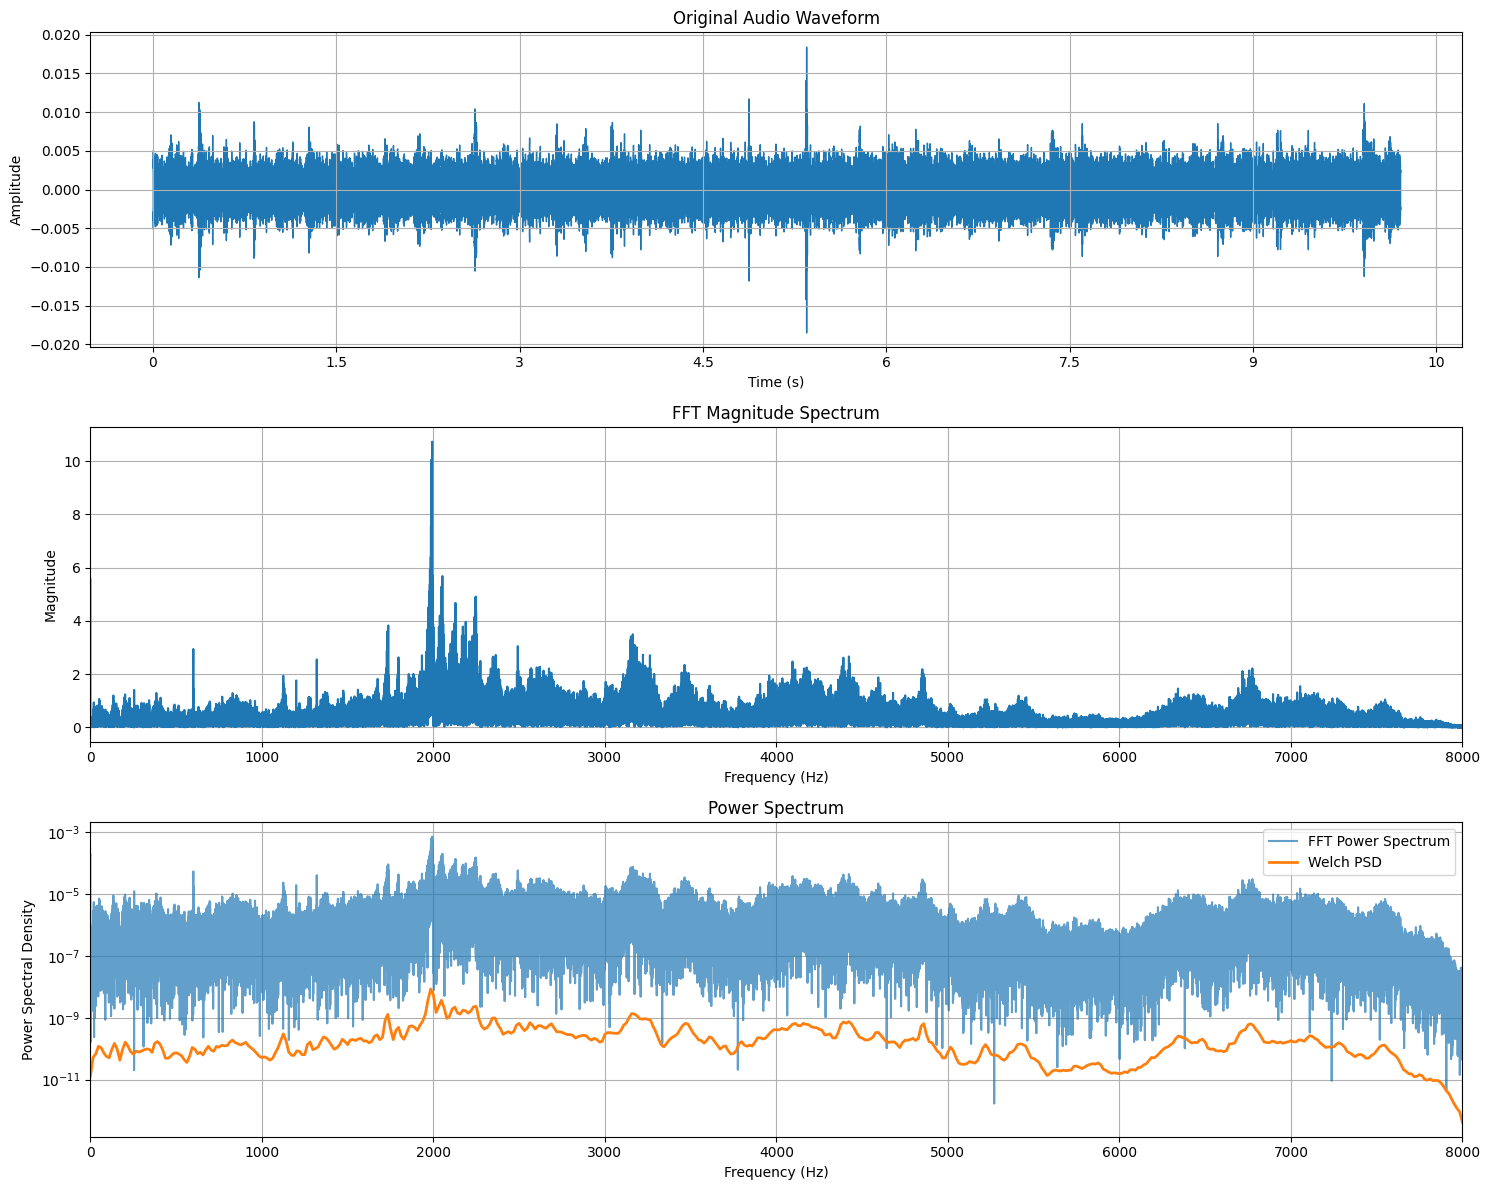


Frequency Analysis Results:
Frequency resolution: 0.10 Hz
Nyquist frequency: 8000.00 Hz
Dominant frequency: 1992.94 Hz

Top 5 dominant frequencies:
1. 1992.94 Hz (Magnitude: 1.07e+01)
2. 1987.16 Hz (Magnitude: 1.00e+01)
3. 1992.55 Hz (Magnitude: 9.45e+00)
4. 1992.36 Hz (Magnitude: 7.85e+00)
5. 1991.08 Hz (Magnitude: 7.65e+00)


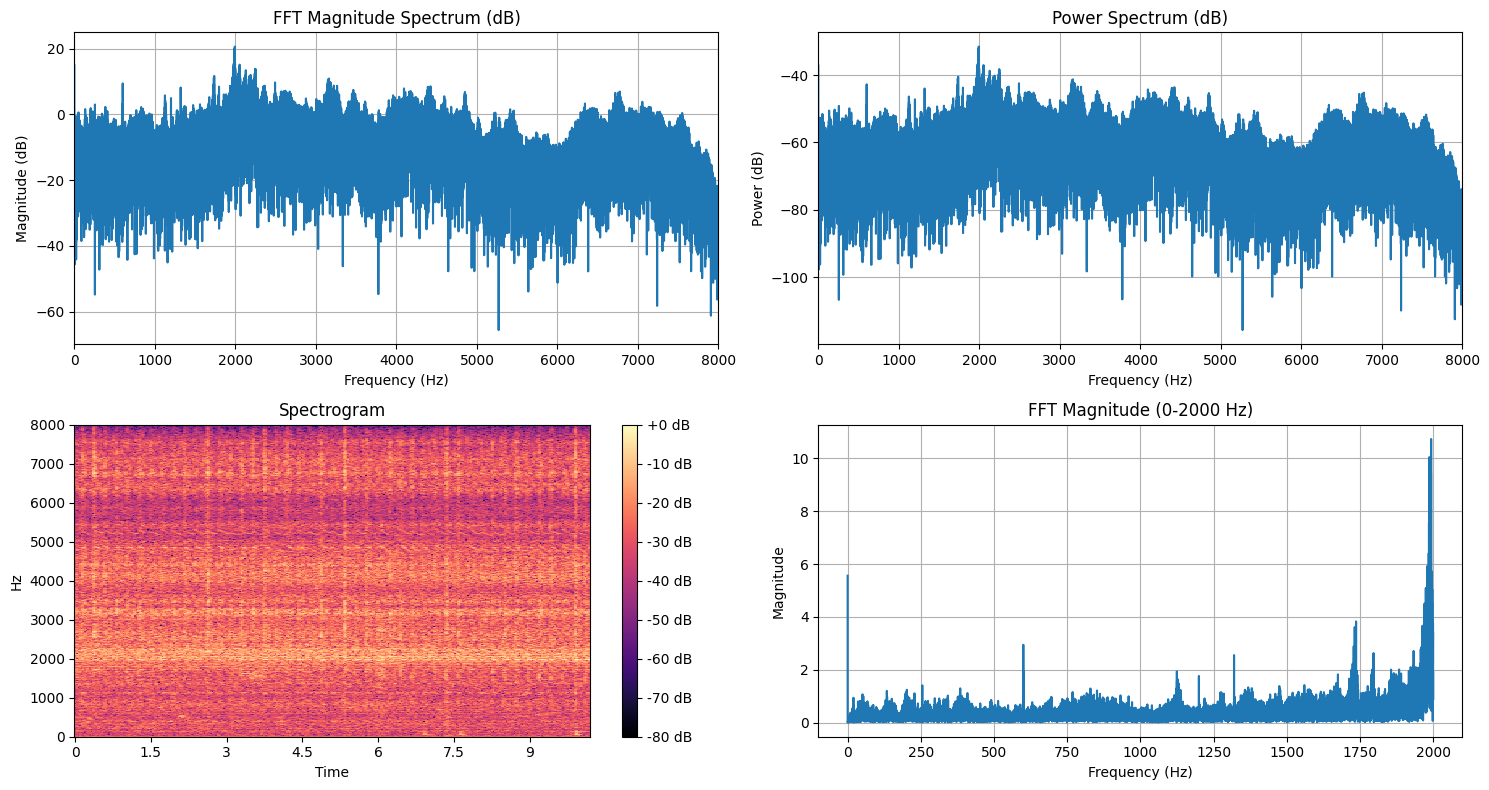

Menggunakan sampling rate: 16000 Hz
Frekuensi Nyquist: 8000.0 Hz
Wp normalized: [0.2, 0.3125]
Ws normalized: [0.1875, 0.325]
Orde minimum Butterworth: N = 14
Frekuensi kritis normalisasi Wn = [0.19999226 0.31251095]
Koefisien filter digital (b): [ 6.85921547e-12  0.00000000e+00 -9.60290166e-11  0.00000000e+00
  6.24188608e-10  0.00000000e+00 -2.49675443e-09  0.00000000e+00
  6.86607469e-09  0.00000000e+00 -1.37321494e-08  0.00000000e+00
  2.05982241e-08  0.00000000e+00 -2.35408275e-08  0.00000000e+00
  2.05982241e-08  0.00000000e+00 -1.37321494e-08  0.00000000e+00
  6.86607469e-09  0.00000000e+00 -2.49675443e-09  0.00000000e+00
  6.24188608e-10  0.00000000e+00 -9.60290166e-11  0.00000000e+00
  6.85921547e-12]
Koefisien filter digital (a): [ 1.00000000e+00 -1.74910429e+01  1.53028885e+02 -8.88507889e+02
  3.83592489e+03 -1.30883666e+04  3.66455261e+04 -8.63308471e+04
  1.74164337e+05 -3.04733532e+05  4.66758684e+05 -6.30130122e+05
  7.53427602e+05 -8.00461081e+05  7.57077379e+05 -6.3783

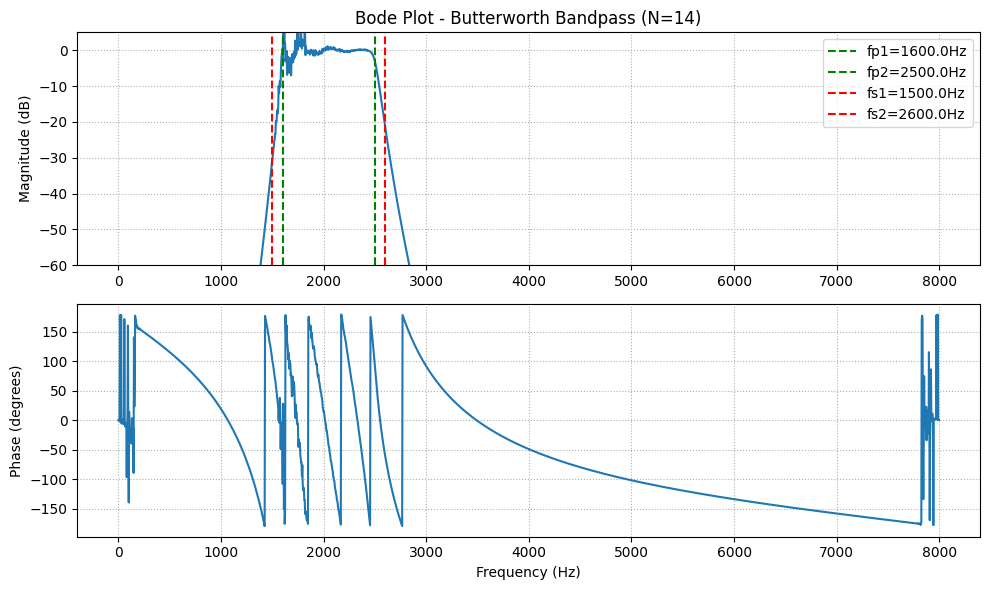

Panjang sinyal: 163280 samples
Durasi: 10.21 detik
Filter berhasil diterapkan!
Range sinyal asli: [-0.014160, 0.018463]
Range sinyal filtered: [-0.005166, 0.005227]


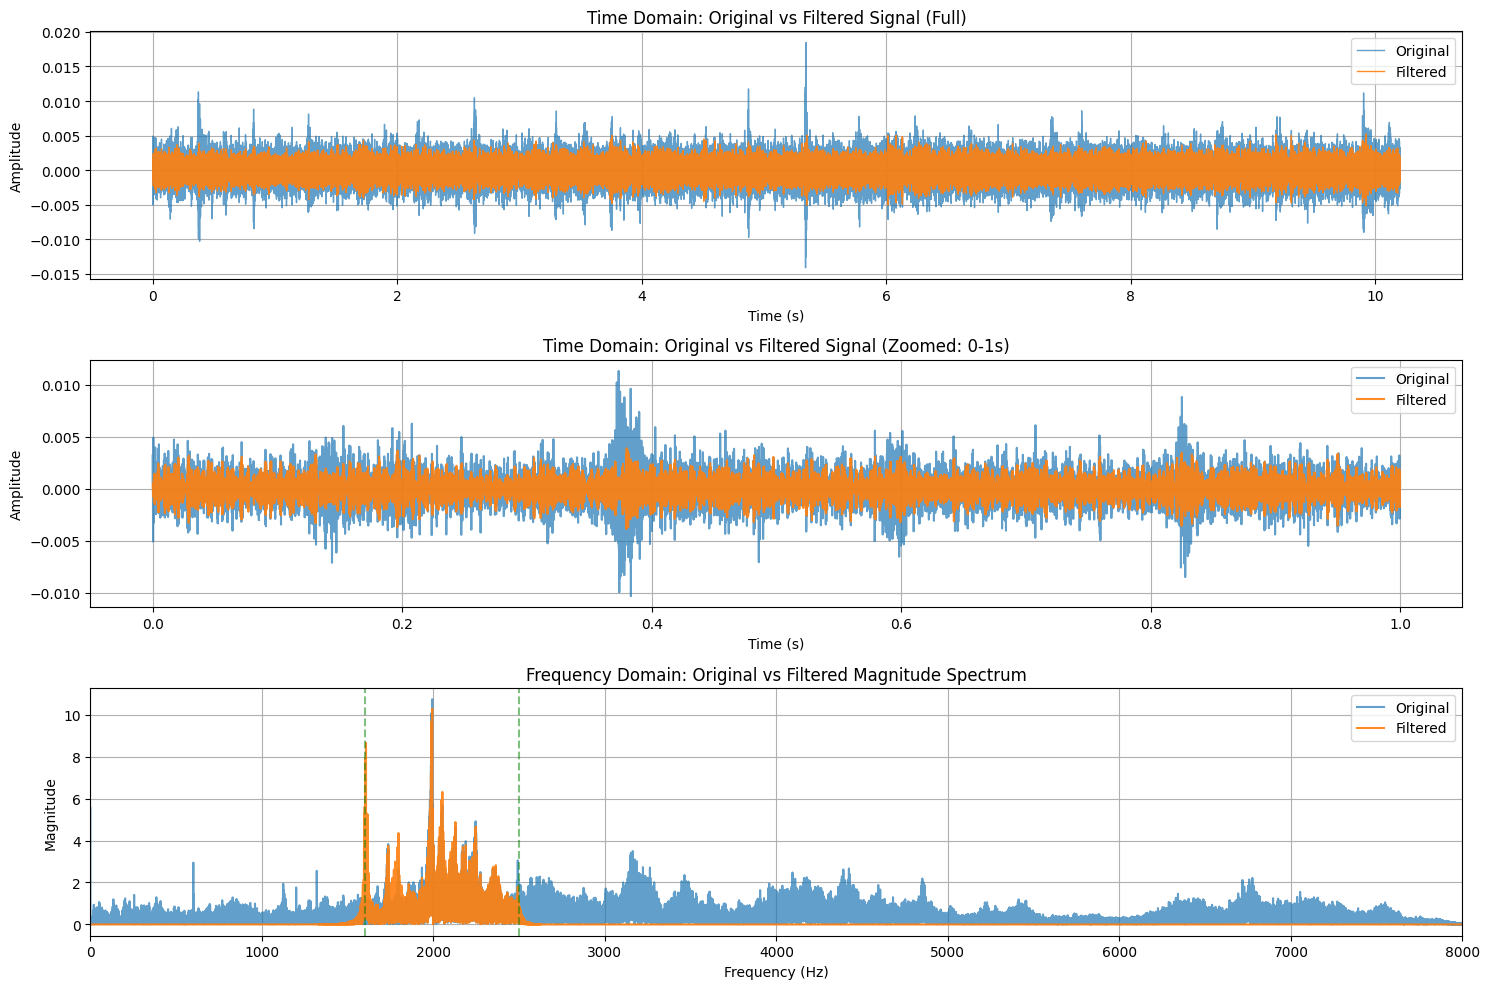


Menyimpan audio terfilter...
Output directory: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/
✓ File WAV berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1400_filtered_bandpass_1600-2500Hz.wav
  Verifikasi - Sample rate: 16000 Hz, Shape: (163280,)
✓ File WAV (librosa) berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1400_filtered_librosa.wav
✓ File FLAC berhasil disimpan: /content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/1400_filtered.flac

Perbandingan File Audio:
Original - Sample rate: 16000 Hz, Duration: 10.21s
Filtered - Sample rate: 16000 Hz, Duration: 10.21s
RMS Original: 0.001547
RMS Filtered: 0.001097

Analisis Energi:
Energi sinyal asli: 3.91e-01
Energi sinyal filtered: 2.01e-01
Rasio energi (filtered/original): 0.5140

Analisis RMS:
RMS sinyal asli: 0.001547
RMS sinyal filtered: 0.001109
Rasio RMS (filtered/original): 0.7170

RINGKASAN FILE YAN

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from google.colab import drive
import os

def load_audio_file(file_path):
    """
    Load audio file using both scipy and librosa for compatibility
    Returns: audio data, sample rate
    """
    try:
        # Try with scipy first (for standard WAV files)
        sample_rate, audio_data = wavfile.read(file_path)

        # Convert to float if needed
        if audio_data.dtype == np.int16:
            audio_data = audio_data.astype(np.float32) / 32768.0
        elif audio_data.dtype == np.int32:
            audio_data = audio_data.astype(np.float32) / 2147483648.0

    except:
        # Fallback to librosa for other formats
        audio_data, sample_rate = librosa.load(file_path, sr=None)

    return audio_data, sample_rate

# Replace with your actual file path in Google Drive
file_path = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Propeller/M2/1400.wav'
audio_data, fs = load_audio_file(file_path)

print(f"Audio loaded successfully!")
print(f"Sample rate: {fs} Hz")
print(f"Duration: {len(audio_data)/fs:.2f} seconds")
print(f"Data shape: {audio_data.shape}")

# Handle stereo audio by taking the first channel
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]
    print("Stereo audio detected, using first channel")

# Plot waveform (original code)
plt.figure(figsize=(15, 12))

# Subplot 1: Original waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_data, sr=fs)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# FFT Analysis
# Compute FFT
N = len(audio_data)
fft_data = np.fft.fft(audio_data)
fft_magnitude = np.abs(fft_data)
fft_phase = np.angle(fft_data)

# Create frequency axis
freqs = np.fft.fftfreq(N, 1/fs)

# Only take positive frequencies (first half)
positive_freqs = freqs[:N//2]
positive_magnitude = fft_magnitude[:N//2]

# Subplot 2: FFT Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(positive_freqs, positive_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, fs/2)  # Nyquist frequency limit

# Power Spectrum Analysis
# Method 1: Power Spectrum from FFT
power_spectrum = (fft_magnitude ** 2) / N
positive_power = power_spectrum[:N//2]

# Method 2: Power Spectral Density using Welch's method (more robust)
from scipy.signal import welch
f_welch, psd_welch = welch(audio_data, fs, nperseg=1024)

# Subplot 3: Power Spectrum
plt.subplot(3, 1, 3)
# Plot both methods for comparison
plt.semilogy(positive_freqs, positive_power, label='FFT Power Spectrum', alpha=0.7)
plt.semilogy(f_welch, psd_welch, label='Welch PSD', linewidth=2)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nFrequency Analysis Results:")
print(f"Frequency resolution: {fs/N:.2f} Hz")
print(f"Nyquist frequency: {fs/2:.2f} Hz")

# Find dominant frequencies
dominant_freq_idx = np.argmax(positive_magnitude[1:]) + 1  # Skip DC component
dominant_frequency = positive_freqs[dominant_freq_idx]
print(f"Dominant frequency: {dominant_frequency:.2f} Hz")

# Find top 5 frequencies
top_5_indices = np.argsort(positive_magnitude[1:])[-5:][::-1] + 1  # Skip DC, get top 5
print(f"\nTop 5 dominant frequencies:")
for i, idx in enumerate(top_5_indices):
    freq = positive_freqs[idx]
    magnitude = positive_magnitude[idx]
    print(f"{i+1}. {freq:.2f} Hz (Magnitude: {magnitude:.2e})")

# Optional: Create a more detailed frequency analysis plot
plt.figure(figsize=(15, 8))

# Plot 1: FFT Magnitude in dB scale
plt.subplot(2, 2, 1)
magnitude_db = 20 * np.log10(positive_magnitude + 1e-12)  # Add small value to avoid log(0)
plt.plot(positive_freqs, magnitude_db)
plt.title('FFT Magnitude Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 2: Power Spectrum in dB scale
plt.subplot(2, 2, 2)
power_db = 10 * np.log10(positive_power + 1e-12)
plt.plot(positive_freqs, power_db)
plt.title('Power Spectrum (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.grid(True)
plt.xlim(0, fs/2)

# Plot 3: Spectrogram
plt.subplot(2, 2, 3)
D = librosa.stft(audio_data)
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(DB, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot 4: Zoomed view of low frequencies (0-2000 Hz)
plt.subplot(2, 2, 4)
freq_limit = 2000
limit_idx = np.where(positive_freqs <= freq_limit)[0][-1]
plt.plot(positive_freqs[:limit_idx], positive_magnitude[:limit_idx])
plt.title(f'FFT Magnitude (0-{freq_limit} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# BAGIAN FILTER - DIPERBAIKI
# =========================================

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# =========================================
# 1. Definisikan parameter utama
# =========================================

# Gunakan sampling rate dari audio yang dimuat
print(f"Menggunakan sampling rate: {fs} Hz")

fp1, fp2 = 1600.0, 2500.0   # [Hz] batas passband
fs1, fs2 = 1500.0, 2600.0   # [Hz] batas stopband

Rp = 3.0    # Ripple di passband (dB)
Rs = 20.0   # Atenuasi di stopband (dB)

# =========================================
# 2. Normalisasi frekuensi (terhadap Nyquist)
# =========================================

nyq = fs / 2.0
Wp = [fp1 / nyq, fp2 / nyq]
Ws = [fs1 / nyq, fs2 / nyq]

print(f"Frekuensi Nyquist: {nyq} Hz")
print(f"Wp normalized: {Wp}")
print(f"Ws normalized: {Ws}")

# =========================================
# 3. Hitung orde minimum (N) dan Wn via buttord
# =========================================

N, Wn = sig.buttord(wp=Wp, ws=Ws, gpass=Rp, gstop=Rs)
print(f"Orde minimum Butterworth: N = {N}")
print(f"Frekuensi kritis normalisasi Wn = {Wn}")

# =========================================
# 4. Dapatkan koefisien filter (b, a) - LANGSUNG DIGITAL
# =========================================

# Gunakan butter langsung untuk mendapatkan filter digital
b, a = sig.butter(N, Wn, btype='bandpass')
print("Koefisien filter digital (b):", b)
print("Koefisien filter digital (a):", a)

# =========================================
# 5. Plot respons frekuensi filter
# =========================================

w, h = sig.freqz(b, a, worN=2048, fs=fs)

plt.figure(figsize=(10, 6))

# Plot magnitude
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title(f'Bode Plot - Butterworth Bandpass (N={N})')
plt.ylabel('Magnitude (dB)')
plt.axvline(fp1, color='green', linestyle='--', label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', label=f'fp2={fp2}Hz')
plt.axvline(fs1, color='red', linestyle='--', label=f'fs1={fs1}Hz')
plt.axvline(fs2, color='red', linestyle='--', label=f'fs2={fs2}Hz')
plt.ylim(-60, 5)
plt.grid(True, which='both', ls=':')
plt.legend()

# Plot phase
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h, deg=True))
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

# =========================================
# 6. TERAPKAN FILTER KE SINYAL AUDIO
# =========================================

# Definisikan variabel yang diperlukan untuk plotting
y = audio_data # Sinyal asli
t = np.arange(len(y)) / fs # Array waktu

print(f"Panjang sinyal: {len(y)} samples")
print(f"Durasi: {len(y)/fs:.2f} detik")

# Terapkan filter menggunakan filtfilt (zero-phase filtering)
try:
    yfilt = signal.filtfilt(b, a, y)
    print("Filter berhasil diterapkan!")

    # Cek apakah hasil filter valid
    if np.any(np.isnan(yfilt)) or np.any(np.isinf(yfilt)):
        print("WARNING: Filter menghasilkan nilai NaN atau Inf!")
    else:
        print(f"Range sinyal asli: [{np.min(y):.6f}, {np.max(y):.6f}]")
        print(f"Range sinyal filtered: [{np.min(yfilt):.6f}, {np.max(yfilt):.6f}]")

except Exception as e:
    print(f"Error saat menerapkan filter: {e}")
    # Fallback: gunakan lfilter biasa
    yfilt = signal.lfilter(b, a, y)
    print("Menggunakan lfilter sebagai alternatif")

# =========================================
# 7. PLOT PERBANDINGAN SINYAL
# =========================================

# Plot Sinyal Input x(n) dan Output terfilter y(n) dalam domain waktu
plt.figure(figsize=(15, 10))

# Plot 1: Sinyal lengkap
plt.subplot(3, 1, 1)
plt.plot(t, y, label='Original', alpha=0.7, linewidth=1)
plt.plot(t, yfilt, label='Filtered', alpha=0.9, linewidth=1)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Time Domain: Original vs Filtered Signal (Full)")
plt.legend()
plt.grid(True)

# Plot 2: Zoom ke bagian awal (0-1 detik)
plt.subplot(3, 1, 2)
zoom_samples = int(1.0 * fs)  # 1 detik pertama
if zoom_samples < len(t):
    plt.plot(t[:zoom_samples], y[:zoom_samples], label='Original', alpha=0.7)
    plt.plot(t[:zoom_samples], yfilt[:zoom_samples], label='Filtered', alpha=0.9)
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.title("Time Domain: Original vs Filtered Signal (Zoomed: 0-1s)")
    plt.legend()
    plt.grid(True)

# Plot 3: Spektrum frekuensi
plt.subplot(3, 1, 3)

# FFT sinyal asli dan terfilter
yhat = np.fft.fft(y)
yfilthat = np.fft.fft(yfilt)

# Buat sumbu frekuensi
freqs_fft = np.fft.fftfreq(len(y), d=1.0/fs)

# Plot hanya frekuensi positif
positive_idx = freqs_fft >= 0
freqs_positive = freqs_fft[positive_idx]
yhat_positive = yhat[positive_idx]
yfilthat_positive = yfilthat[positive_idx]

plt.plot(freqs_positive, np.abs(yhat_positive), label='Original', alpha=0.7)
plt.plot(freqs_positive, np.abs(yfilthat_positive), label='Filtered', alpha=0.9)
plt.xlim([0, fs/2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain: Original vs Filtered Magnitude Spectrum")
plt.legend()
plt.grid(True)

# Tambahkan garis vertikal untuk menunjukkan batas filter
plt.axvline(fp1, color='green', linestyle='--', alpha=0.5, label=f'fp1={fp1}Hz')
plt.axvline(fp2, color='green', linestyle='--', alpha=0.5, label=f'fp2={fp2}Hz')

plt.tight_layout()
plt.show()

# =========================================
# 8. MENYIMPAN AUDIO TERFILTER
# =========================================

# Persiapkan data audio untuk disimpan
def prepare_audio_for_saving(audio_data, target_dtype='int16'):
    """
    Persiapkan data audio untuk disimpan dengan normalisasi yang tepat
    """
    # Pastikan audio dalam range [-1, 1]
    max_val = np.max(np.abs(audio_data))
    if max_val > 1.0:
        audio_normalized = audio_data / max_val
        print(f"Audio dinormalisasi: max value {max_val:.6f} -> 1.0")
    else:
        audio_normalized = audio_data

    # Konversi ke format integer sesuai target
    if target_dtype == 'int16':
        audio_int = (audio_normalized * 32767).astype(np.int16)
    elif target_dtype == 'int32':
        audio_int = (audio_normalized * 2147483647).astype(np.int32)
    else:
        audio_int = audio_normalized.astype(np.float32)

    return audio_int

# Tentukan path untuk menyimpan file
output_dir = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered/'
os.makedirs(output_dir, exist_ok=True)

# Nama file output
base_filename = os.path.splitext(os.path.basename(file_path))[0]
output_filename_wav = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.wav"
output_filename_mp3 = f"{base_filename}_filtered_bandpass_{int(fp1)}-{int(fp2)}Hz.mp3"

output_path_wav = os.path.join(output_dir, output_filename_wav)
output_path_mp3 = os.path.join(output_dir, output_filename_mp3)

print(f"\nMenyimpan audio terfilter...")
print(f"Output directory: {output_dir}")

# =========================================
# Metode 1: Simpan sebagai WAV menggunakan scipy.io.wavfile
# =========================================

try:
    # Persiapkan data untuk WAV (16-bit integer)
    yfilt_wav = prepare_audio_for_saving(yfilt, 'int16')

    # Simpan file WAV
    wavfile.write(output_path_wav, int(fs), yfilt_wav)
    print(f"✓ File WAV berhasil disimpan: {output_path_wav}")

    # Verifikasi file yang disimpan
    verify_fs, verify_data = wavfile.read(output_path_wav)
    print(f"  Verifikasi - Sample rate: {verify_fs} Hz, Shape: {verify_data.shape}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV: {e}")

# =========================================
# Metode 2: Simpan sebagai WAV menggunakan librosa
# =========================================

try:
    # Librosa expects float32 data in range [-1, 1]
    yfilt_librosa = prepare_audio_for_saving(yfilt, 'float32')

    # Path alternatif untuk librosa
    output_path_wav_librosa = os.path.join(output_dir, f"{base_filename}_filtered_librosa.wav")

    # Simpan menggunakan librosa
    import soundfile as sf  # librosa menggunakan soundfile di backend
    sf.write(output_path_wav_librosa, yfilt_librosa, int(fs))
    print(f"✓ File WAV (librosa) berhasil disimpan: {output_path_wav_librosa}")

except Exception as e:
    print(f"✗ Error menyimpan file WAV dengan librosa: {e}")
    print("  Note: Pastikan soundfile terinstall: !pip install soundfile")

# =========================================
# Metode 3: Simpan dalam format lain (opsional)
# =========================================

# Jika ingin menyimpan dalam format lain, bisa menggunakan librosa
try:
    # Simpan sebagai FLAC (lossless compression)
    output_path_flac = os.path.join(output_dir, f"{base_filename}_filtered.flac")
    yfilt_flac = prepare_audio_for_saving(yfilt, 'float32')
    sf.write(output_path_flac, yfilt_flac, int(fs), format='FLAC')
    print(f"✓ File FLAC berhasil disimpan: {output_path_flac}")

except Exception as e:
    print(f"✗ Error menyimpan file FLAC: {e}")

# =========================================
# Fungsi untuk membandingkan file asli dan terfilter
# =========================================

def compare_audio_files(original_path, filtered_path):
    """
    Bandingkan file audio asli dan terfilter
    """
    try:
        # Load kedua file
        orig_data, orig_fs = load_audio_file(original_path)
        filt_data, filt_fs = load_audio_file(filtered_path)

        print(f"\nPerbandingan File Audio:")
        print(f"Original - Sample rate: {orig_fs} Hz, Duration: {len(orig_data)/orig_fs:.2f}s")
        print(f"Filtered - Sample rate: {filt_fs} Hz, Duration: {len(filt_data)/filt_fs:.2f}s")
        print(f"RMS Original: {np.sqrt(np.mean(orig_data**2)):.6f}")
        print(f"RMS Filtered: {np.sqrt(np.mean(filt_data**2)):.6f}")

        return True
    except Exception as e:
        print(f"Error membandingkan file: {e}")
        return False

# Bandingkan file asli dengan file terfilter yang disimpan
if os.path.exists(output_path_wav):
    compare_audio_files(file_path, output_path_wav)

# =========================================
# Membuat fungsi untuk batch processing (opsional)
# =========================================

def batch_filter_audio(input_dir, output_dir, filter_params):
    """
    Batch processing untuk memfilter multiple file audio

    Parameters:
    - input_dir: direktori input yang berisi file audio
    - output_dir: direktori output untuk menyimpan hasil filter
    - filter_params: dictionary berisi parameter filter
    """

    # Buat direktori output jika belum ada
    os.makedirs(output_dir, exist_ok=True)

    # Format file audio yang didukung
    supported_formats = ['.wav', '.mp3', '.flac', '.m4a']

    # Cari semua file audio di direktori input
    audio_files = []
    for ext in supported_formats:
        audio_files.extend([f for f in os.listdir(input_dir) if f.lower().endswith(ext)])

    print(f"Ditemukan {len(audio_files)} file audio untuk diproses...")

    for i, filename in enumerate(audio_files):
        try:
            print(f"\nMemproses file {i+1}/{len(audio_files)}: {filename}")

            # Load audio
            input_path = os.path.join(input_dir, filename)
            audio_data, fs = load_audio_file(input_path)

            # Handle stereo
            if len(audio_data.shape) > 1:
                audio_data = audio_data[:, 0]

            # Design filter dengan parameter yang diberikan
            nyq = fs / 2.0
            Wp = [filter_params['fp1'] / nyq, filter_params['fp2'] / nyq]
            Ws = [filter_params['fs1'] / nyq, filter_params['fs2'] / nyq]

            N, Wn = sig.buttord(wp=Wp, ws=Ws,
                               gpass=filter_params['Rp'],
                               gstop=filter_params['Rs'])
            b, a = sig.butter(N, Wn, btype='bandpass')

            # Terapkan filter
            filtered_audio = signal.filtfilt(b, a, audio_data)

            # Simpan hasil filter
            base_name = os.path.splitext(filename)[0]
            output_filename = f"{base_name}_filtered_bp_{int(filter_params['fp1'])}-{int(filter_params['fp2'])}Hz.wav"
            output_path = os.path.join(output_dir, output_filename)

            # Prepare dan simpan
            filtered_for_save = prepare_audio_for_saving(filtered_audio, 'int16')
            wavfile.write(output_path, int(fs), filtered_for_save)

            print(f"  ✓ Berhasil: {output_filename}")

        except Exception as e:
            print(f"  ✗ Error memproses {filename}: {e}")

    print(f"\nBatch processing selesai!")

# Contoh penggunaan batch processing
# Uncomment baris di bawah jika ingin memproses semua file dalam direktori
"""
batch_params = {
    'fp1': fp1, 'fp2': fp2,
    'fs1': fs1, 'fs2': fs2,
    'Rp': Rp, 'Rs': Rs
}

input_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/'
output_directory = '/content/drive/MyDrive/Test_dataset/BLDC_sound_data/Bearing/M4/filtered_batch/'

# batch_filter_audio(input_directory, output_directory, batch_params)
"""

# =========================================
# 9. ANALISIS TAMBAHAN
# =========================================

# Hitung energi sinyal
energy_original = np.sum(y**2)
energy_filtered = np.sum(yfilt**2)

print(f"\nAnalisis Energi:")
print(f"Energi sinyal asli: {energy_original:.2e}")
print(f"Energi sinyal filtered: {energy_filtered:.2e}")
print(f"Rasio energi (filtered/original): {energy_filtered/energy_original:.4f}")

# Analisis RMS
rms_original = np.sqrt(np.mean(y**2))
rms_filtered = np.sqrt(np.mean(yfilt**2))

print(f"\nAnalisis RMS:")
print(f"RMS sinyal asli: {rms_original:.6f}")
print(f"RMS sinyal filtered: {rms_filtered:.6f}")
print(f"Rasio RMS (filtered/original): {rms_filtered/rms_original:.4f}")

# Informasi file yang disimpan
print(f"\n" + "="*50)
print("RINGKASAN FILE YANG DISIMPAN:")
print("="*50)
if os.path.exists(output_path_wav):
    file_size = os.path.getsize(output_path_wav)
    print(f"✓ {output_filename_wav}")
    print(f"  Size: {file_size/1024:.1f} KB")
    print(f"  Path: {output_path_wav}")

print(f"\nParameter Filter yang Digunakan:")
print(f"- Jenis: Butterworth Bandpass")
print(f"- Orde: {N}")
print(f"- Passband: {fp1}-{fp2} Hz")
print(f"- Stopband: {fs1}-{fs2} Hz")
print(f"- Ripple passband: {Rp} dB")
print(f"- Atenuasi stopband: {Rs} dB")